In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression, LogisticRegression
import warnings
warnings.filterwarnings('ignore')
import pprint
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import roc_auc_score
import scorecardpy as sc

# Represent data in standard decimal notation
pd.options.display.float_format = '{:.2f}'.format

### Load Application and Bureau Data

In [12]:
app_data = pd.read_csv('application_data.csv')
app_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [13]:
bureau_data = pd.read_csv("bureau_data.csv")
bureau_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1716428 entries, 0 to 1716427
Data columns (total 17 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_CURR              int64  
 1   SK_ID_BUREAU            int64  
 2   CREDIT_ACTIVE           object 
 3   CREDIT_CURRENCY         object 
 4   DAYS_CREDIT             int64  
 5   CREDIT_DAY_OVERDUE      int64  
 6   DAYS_CREDIT_ENDDATE     float64
 7   DAYS_ENDDATE_FACT       float64
 8   AMT_CREDIT_MAX_OVERDUE  float64
 9   CNT_CREDIT_PROLONG      int64  
 10  AMT_CREDIT_SUM          float64
 11  AMT_CREDIT_SUM_DEBT     float64
 12  AMT_CREDIT_SUM_LIMIT    float64
 13  AMT_CREDIT_SUM_OVERDUE  float64
 14  CREDIT_TYPE             object 
 15  DAYS_CREDIT_UPDATE      int64  
 16  AMT_ANNUITY             float64
dtypes: float64(8), int64(6), object(3)
memory usage: 222.6+ MB


## 1. Data Exploration (FEEL FREE TO DELETE IF NOT NEEDED, IM NOT SURE ;-;)

- graphically show the organization types countplot
- graphically show age ranges countplot
- distribution graphs
- create new features

## 1.1 Univariate Analysis 

### Application Data


Histogram - Relevant Continuous Variables 

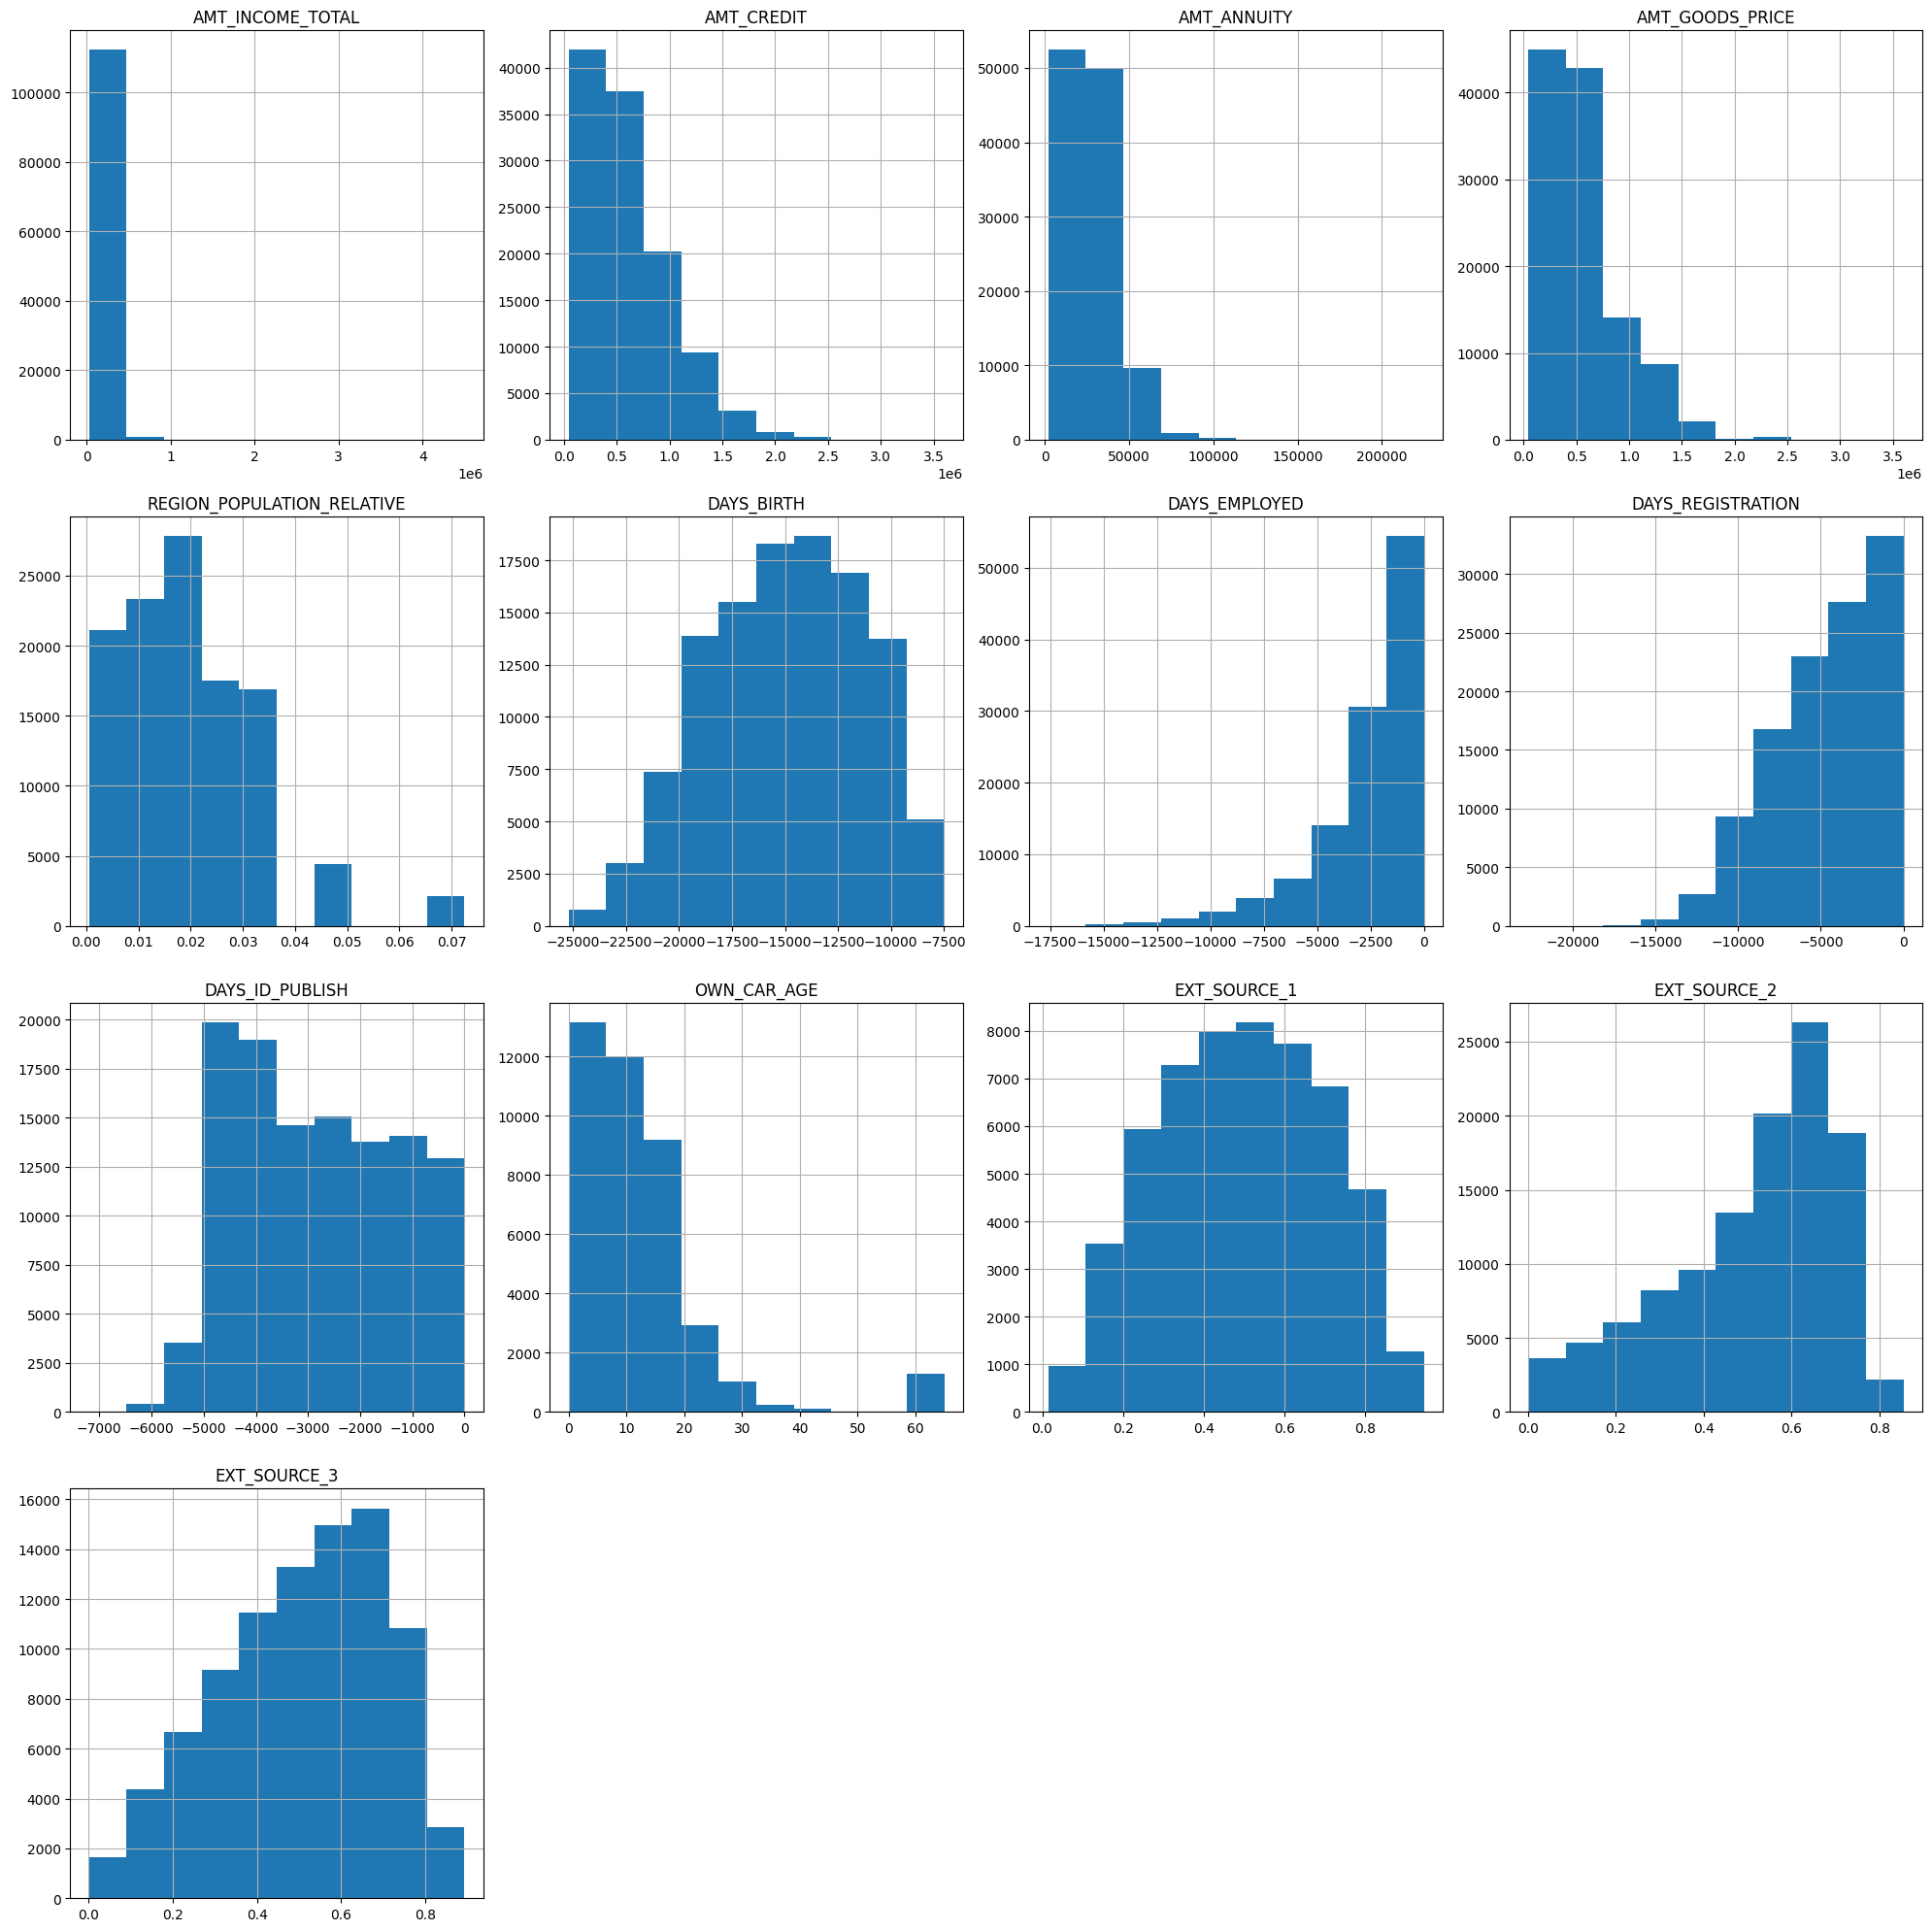

In [85]:
cont_var = ["AMT_INCOME_TOTAL",
            "AMT_CREDIT",
            "AMT_ANNUITY",
            "AMT_GOODS_PRICE",
            "REGION_POPULATION_RELATIVE",
            "DAYS_BIRTH",
            "DAYS_EMPLOYED",
            "DAYS_REGISTRATION",
            "DAYS_ID_PUBLISH",
            "OWN_CAR_AGE",
            "EXT_SOURCE_1",
            "EXT_SOURCE_2",
            "EXT_SOURCE_3"]


app_data[cont_var].hist(figsize=(20,20))
plt.tight_layout()

Bar Chart - Relevant Discrete & Categorical Variables

[Text(0, 0, 'Business Entity Type 3'),
 Text(1, 0, 'School'),
 Text(2, 0, 'Government'),
 Text(3, 0, 'Religion'),
 Text(4, 0, 'Other'),
 Text(5, 0, 'XNA'),
 Text(6, 0, 'Electricity'),
 Text(7, 0, 'Medicine'),
 Text(8, 0, 'Business Entity Type 2'),
 Text(9, 0, 'Self-employed'),
 Text(10, 0, 'Transport: type 2'),
 Text(11, 0, 'Construction'),
 Text(12, 0, 'Housing'),
 Text(13, 0, 'Kindergarten'),
 Text(14, 0, 'Trade: type 7'),
 Text(15, 0, 'Industry: type 11'),
 Text(16, 0, 'Military'),
 Text(17, 0, 'Services'),
 Text(18, 0, 'Security Ministries'),
 Text(19, 0, 'Transport: type 4'),
 Text(20, 0, 'Industry: type 1'),
 Text(21, 0, 'Emergency'),
 Text(22, 0, 'Security'),
 Text(23, 0, 'Trade: type 2'),
 Text(24, 0, 'University'),
 Text(25, 0, 'Transport: type 3'),
 Text(26, 0, 'Police'),
 Text(27, 0, 'Business Entity Type 1'),
 Text(28, 0, 'Postal'),
 Text(29, 0, 'Industry: type 4'),
 Text(30, 0, 'Agriculture'),
 Text(31, 0, 'Restaurant'),
 Text(32, 0, 'Culture'),
 Text(33, 0, 'Hotel'),
 Tex

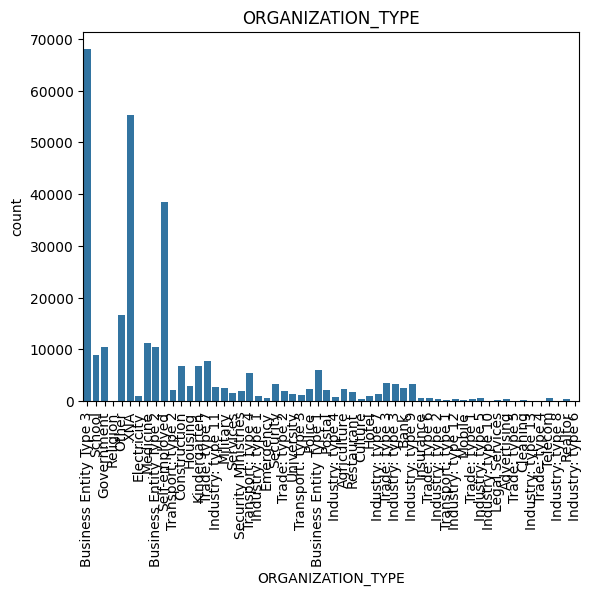

In [15]:
ax = sns.countplot(x= app_data['ORGANIZATION_TYPE'])
plt.title('ORGANIZATION_TYPE')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

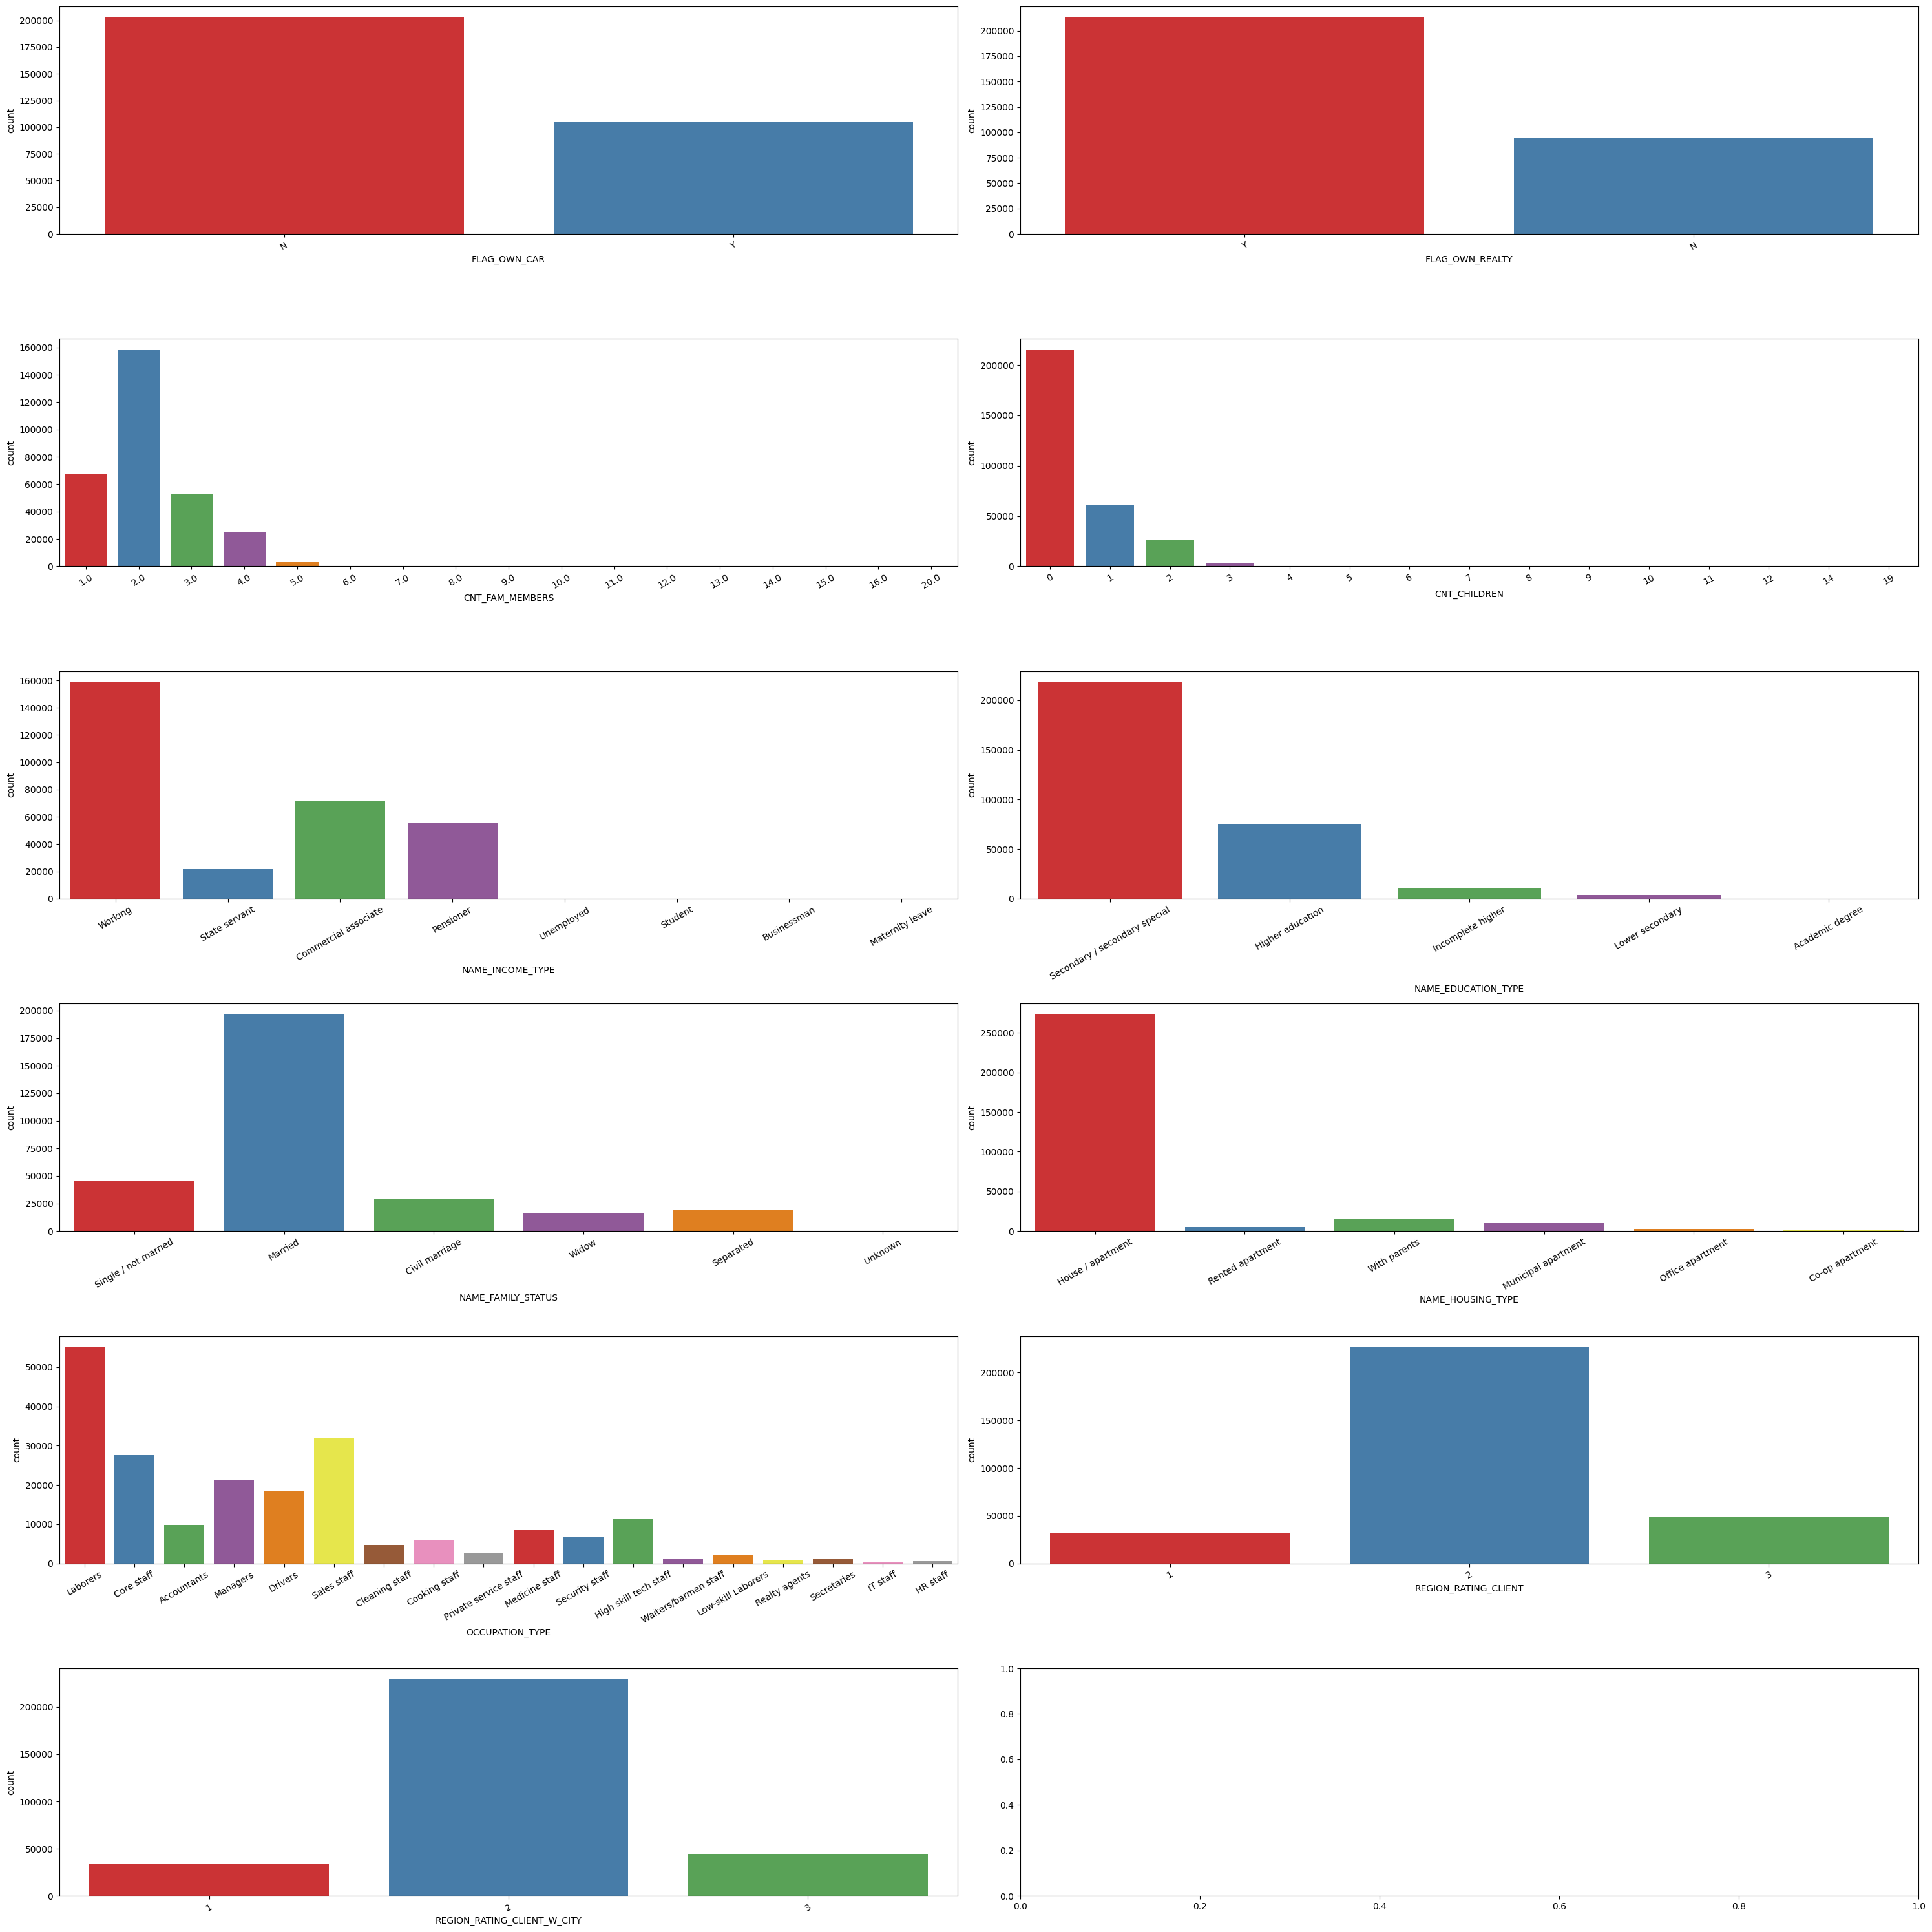

In [16]:
disc_cat_var = ["FLAG_OWN_CAR",
            "FLAG_OWN_REALTY",
            "CNT_FAM_MEMBERS",
            "CNT_CHILDREN",
            "NAME_INCOME_TYPE",
            "NAME_EDUCATION_TYPE",
            "NAME_FAMILY_STATUS",
            "NAME_HOUSING_TYPE",
            "OCCUPATION_TYPE",
            "REGION_RATING_CLIENT",
            "REGION_RATING_CLIENT_W_CITY",
]


row_count=int(np.ceil(len(disc_cat_var)/2))

fig, axes = plt.subplots(ncols=2, nrows=row_count, figsize=(30,30))

for i, axis in enumerate(fig.axes):
    sns.countplot(ax=axis, x=app_data[disc_cat_var[i]],orient='h', palette="Set1")
    axis.set_xlabel(str(disc_cat_var[i]))
    axis.set_xticklabels(axis.get_xticklabels(), rotation=30)
    if i == len(disc_cat_var)-1: 
         break

plt.tight_layout()

### Bureau Data

Histogram - Relevant Continuous Variables 

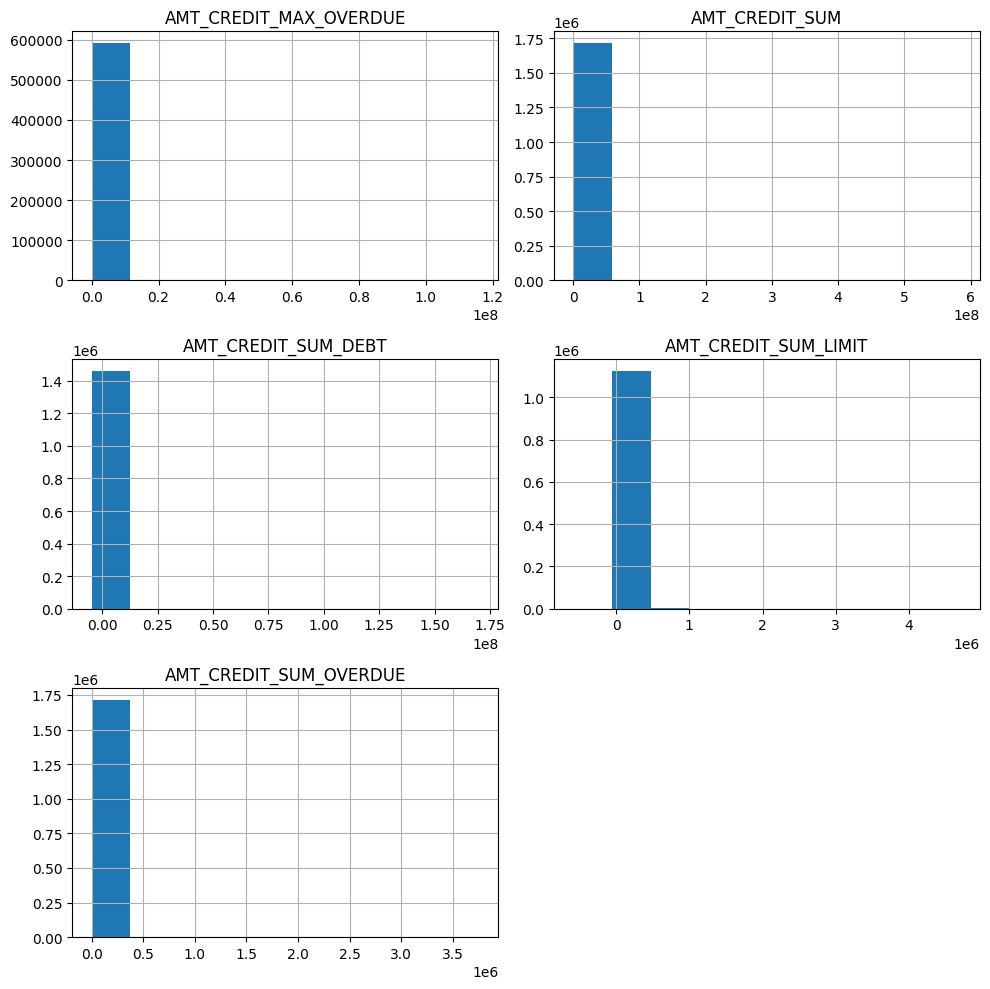

In [17]:
cont_var_bureau = ["AMT_CREDIT_MAX_OVERDUE",
                    "AMT_CREDIT_SUM",
                    "AMT_CREDIT_SUM_DEBT",
                    "AMT_CREDIT_SUM_LIMIT",
                    "AMT_CREDIT_SUM_OVERDUE"]


bureau_data[cont_var_bureau].hist(figsize=(10,10))
plt.tight_layout()

Bar Chart - Relevant Discrete & Categorical Variables

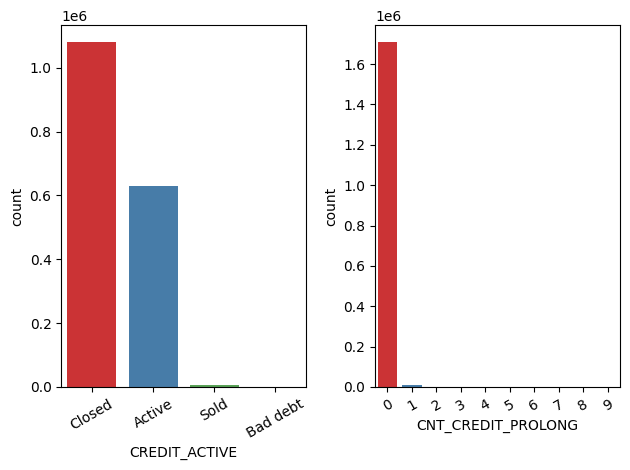

In [109]:
disc_cat_var_bureau = ["CREDIT_ACTIVE",
                       "CNT_CREDIT_PROLONG"]

row_count=int(np.ceil(len(disc_cat_var_bureau)/2))

fig, axes = plt.subplots(ncols=2, nrows=row_count)

for i, axis in enumerate(fig.axes):
    sns.countplot(ax=axis, x=bureau_data[disc_cat_var_bureau[i]],orient='h', palette="Set1")
    axis.set_xlabel(str(disc_cat_var_bureau[i]))
    axis.set_xticklabels(axis.get_xticklabels(), rotation=30)
    if i == len(disc_cat_var_bureau)-1: 
         break
    
plt.tight_layout()

### 1.2 Bivariate Analysis

### Application Data

KDE Plot - Relevant Continuous Variables 

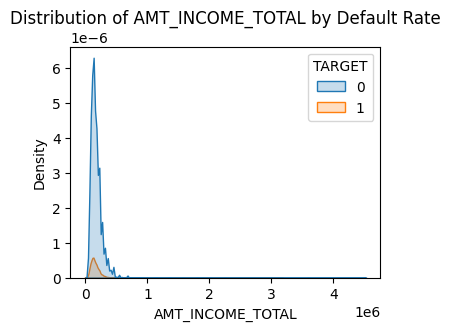

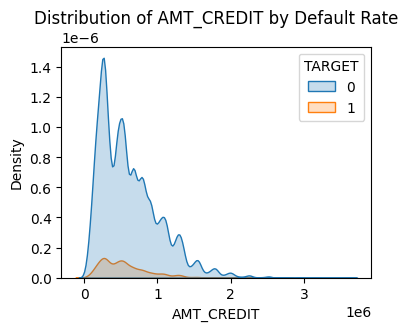

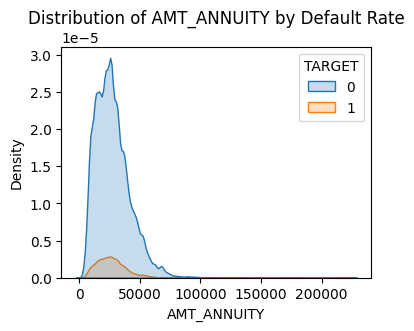

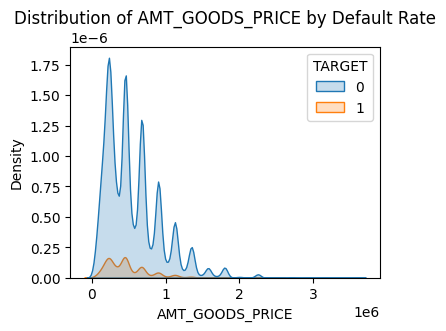

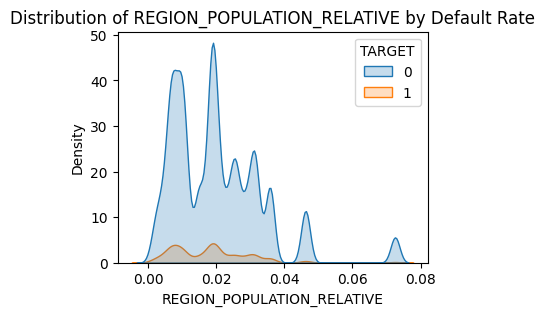

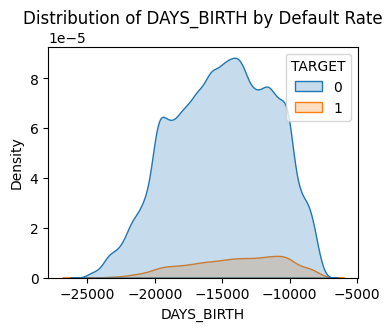

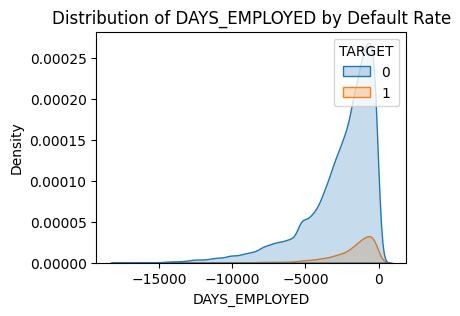

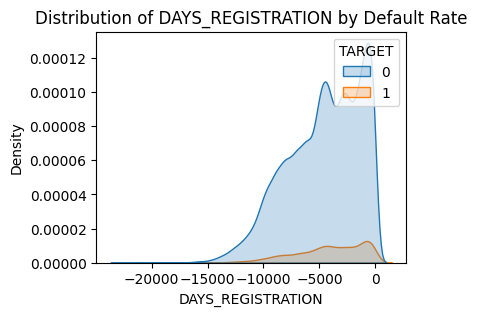

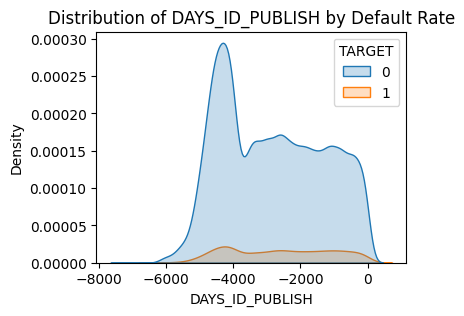

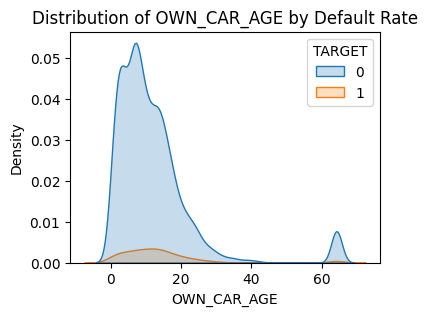

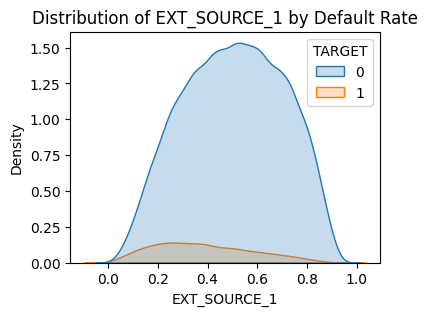

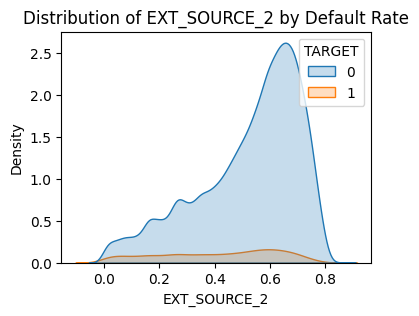

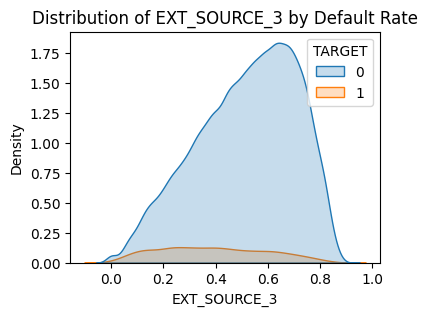

In [118]:

cont_var = ["AMT_INCOME_TOTAL",
            "AMT_CREDIT",
            "AMT_ANNUITY",
            "AMT_GOODS_PRICE",
            "REGION_POPULATION_RELATIVE",
            "DAYS_BIRTH",
            "DAYS_EMPLOYED",
            "DAYS_REGISTRATION",
            "DAYS_ID_PUBLISH",
            "OWN_CAR_AGE",
            "EXT_SOURCE_1",
            "EXT_SOURCE_2",
            "EXT_SOURCE_3"]

for i in range(len(cont_var)):
    plt.figure(figsize=(4,3))
    sns.kdeplot(data=app_data, x=cont_var[i], hue="TARGET", fill = True)
    title = "Distribution of " + cont_var[i] + " by Default Rate"
    plt.title(title)

Bar Charts - Relevant Discrete & Categorical Data

[Text(0, 0, 'School'),
 Text(1, 0, 'Government'),
 Text(2, 0, 'Religion'),
 Text(3, 0, 'Electricity'),
 Text(4, 0, 'Medicine'),
 Text(5, 0, 'Self-employed'),
 Text(6, 0, 'Construction'),
 Text(7, 0, 'Housing'),
 Text(8, 0, 'Kindergarten'),
 Text(9, 0, 'Military'),
 Text(10, 0, 'Services'),
 Text(11, 0, 'Security Ministries'),
 Text(12, 0, 'Emergency'),
 Text(13, 0, 'Security'),
 Text(14, 0, 'University'),
 Text(15, 0, 'Police'),
 Text(16, 0, 'Postal'),
 Text(17, 0, 'Agriculture'),
 Text(18, 0, 'Restaurant'),
 Text(19, 0, 'Culture'),
 Text(20, 0, 'Hotel'),
 Text(21, 0, 'Bank'),
 Text(22, 0, 'Insurance'),
 Text(23, 0, 'Mobile'),
 Text(24, 0, 'Legal Services'),
 Text(25, 0, 'Advertising'),
 Text(26, 0, 'Cleaning'),
 Text(27, 0, 'Telecom'),
 Text(28, 0, 'Realtor')]

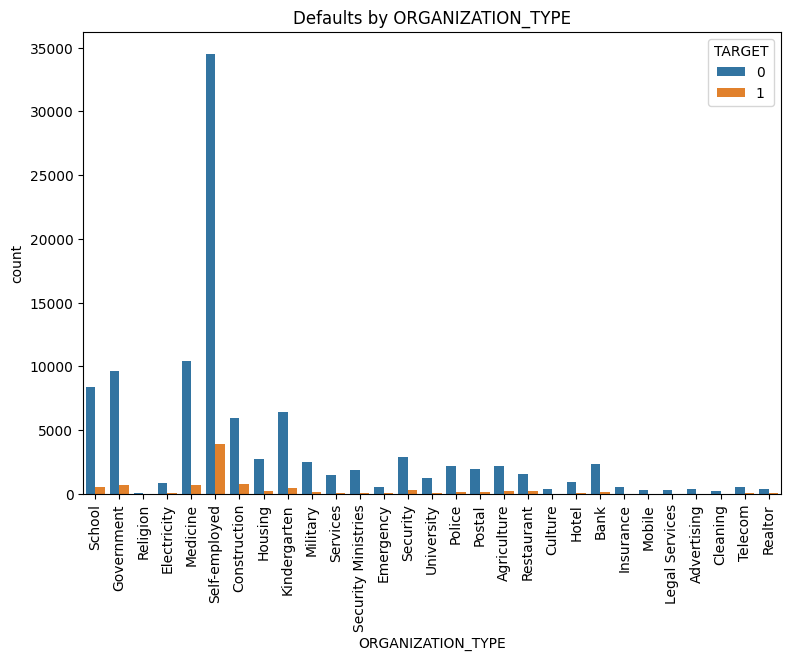

In [46]:
plt.figure(figsize=(9,6))
ax = sns.countplot(x= app_data['ORGANIZATION_TYPE'], hue=app_data['TARGET'])
plt.title('Defaults by ORGANIZATION_TYPE')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

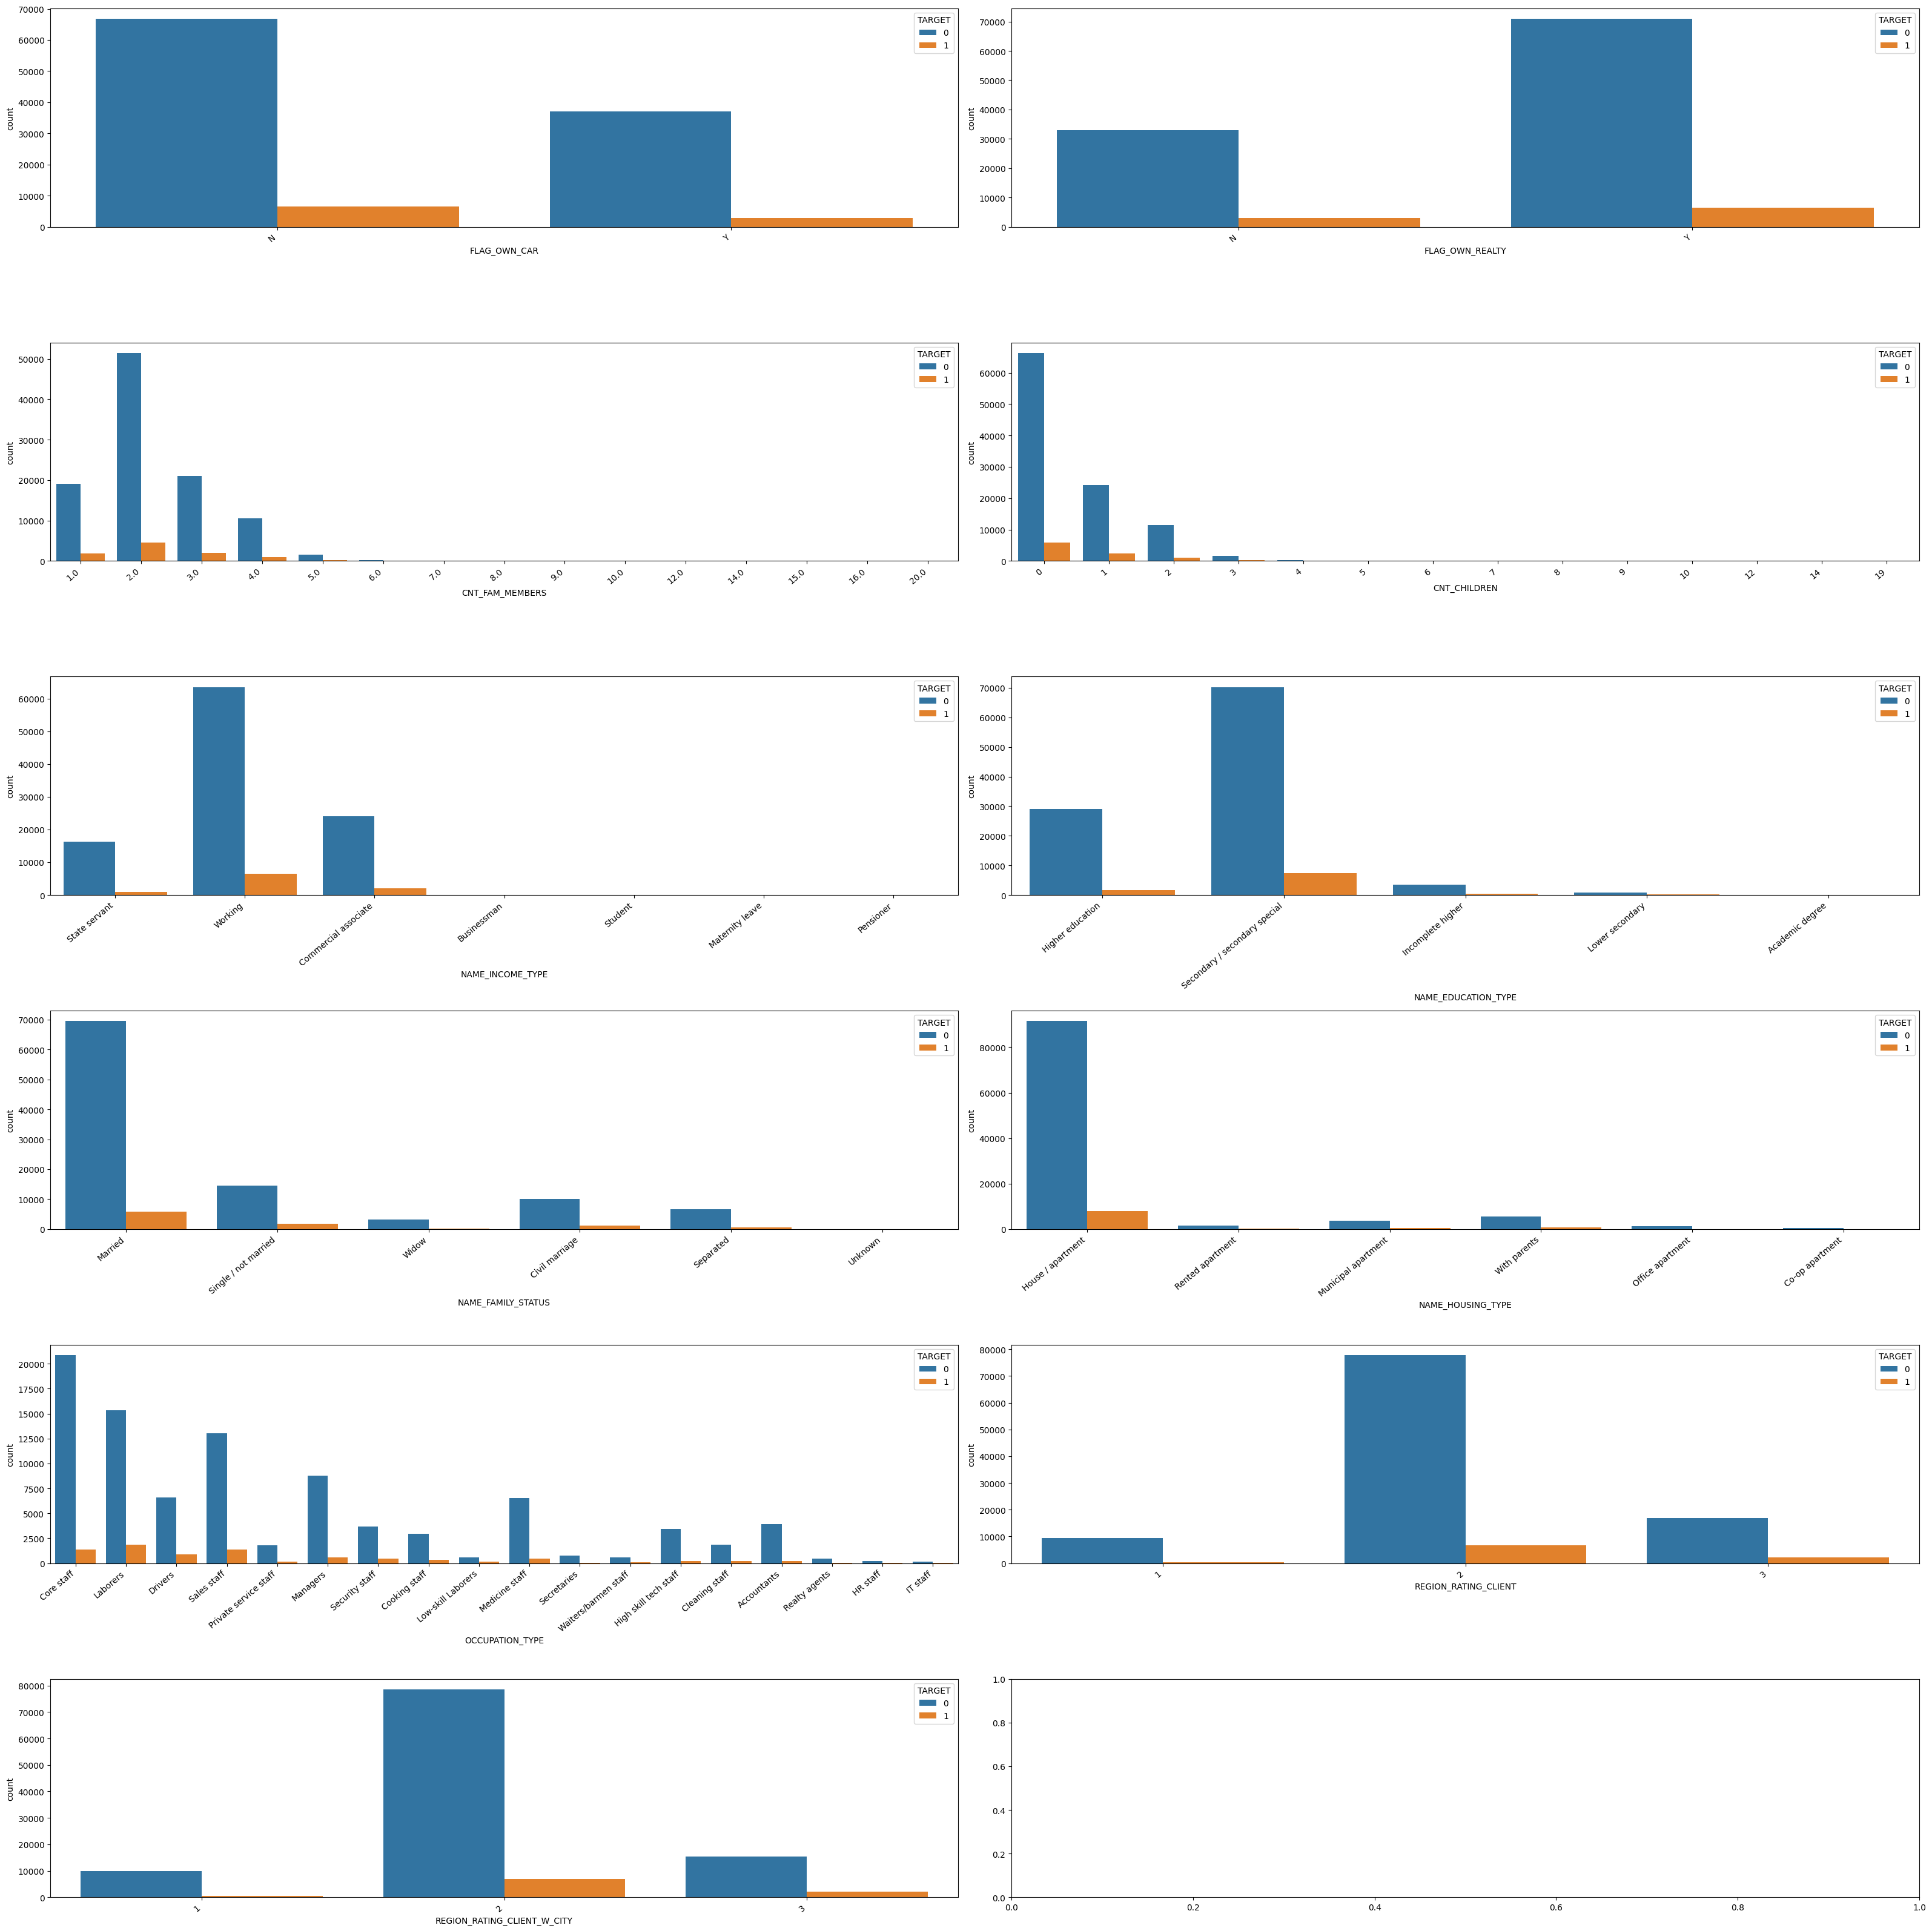

In [108]:
row_count=int(np.ceil(len(disc_cat_var)/2))
fig, axes = plt.subplots(ncols=2, nrows=row_count, figsize=(32, 32))

for i, axis in enumerate(fig.axes):
    sns.countplot(ax=axis, x= app_data[disc_cat_var[i]], hue=app_data['TARGET'])
    axis.set_xlabel(str(disc_cat_var[i]))
    axis.set_xticklabels(axis.get_xticklabels(), rotation=40, ha="right")

    if i == len(disc_cat_var)-1: 
         break
    
# Show the plot
plt.tight_layout()

Stacked Bar Charts - Relevant Discrete & Categorical Data

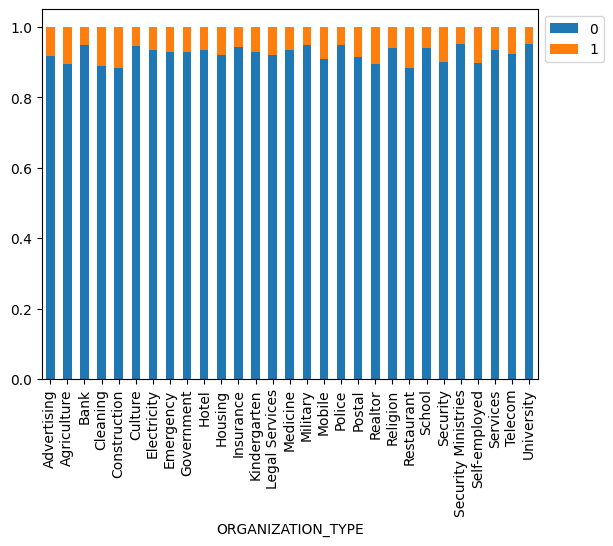

In [22]:
## tried to do smth similar to g2t5's key insights portion to show that default rate for self-employed is q high among organisation_type to prove our point that its harder for self-employed to obtain loans 
## so we want to address lack of loan options for this grp
## but i think its not rly conclusive ;-; prob can j remove HAAHAH

drop = ["Business Entity Type 1","Business Entity Type 2","Business Entity Type 3","Industry: type 1","Industry: type 2", "Industry: type 3",
       "Industry: type 4", "Industry: type 5", "Industry: type 6", "Industry: type 7", "Industry: type 8", "Industry: type 9", "Industry: type 10",
       "Industry: type 11", "Industry: type 12", "Industry: type 13", "Trade: type 1", "Trade: type 2", "Trade: type 3","Trade: type 4",
       "Trade: type 5", "Trade: type 6", "Trade: type 7","Transport: type 1", "Transport: type 2", "Transport: type 3", "Transport: type 4",
       "Other", "XNA"]
for val in drop:
    app_data = app_data.drop(app_data[app_data['ORGANIZATION_TYPE'] == val].index)



df_reason_bivariate = app_data.groupby('ORGANIZATION_TYPE')['TARGET'].value_counts(normalize = True).unstack()
ax = df_reason_bivariate.plot(kind='bar', stacked='True')
ax.legend(bbox_to_anchor=(1.0, 1.0))

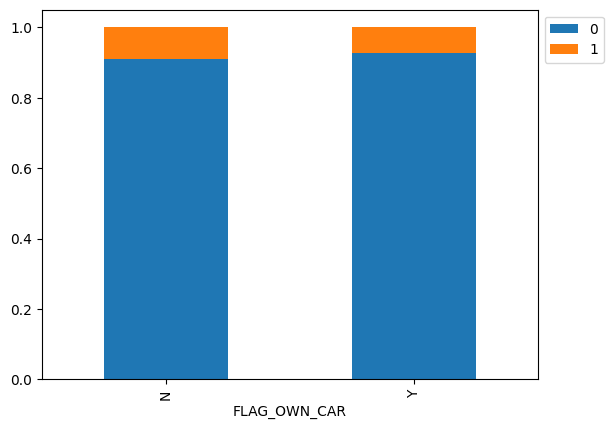

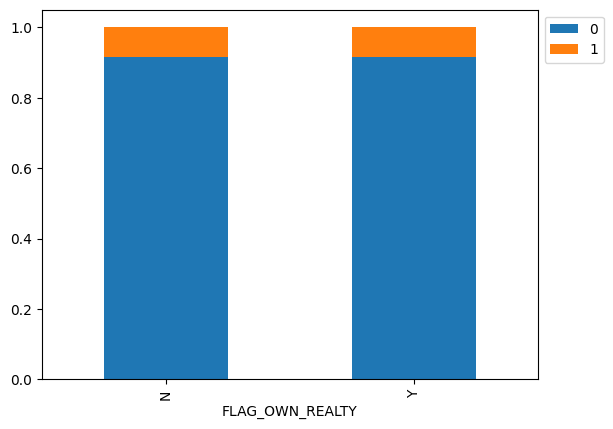

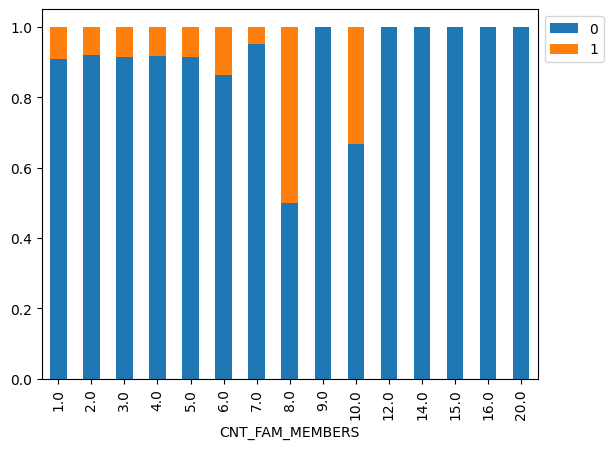

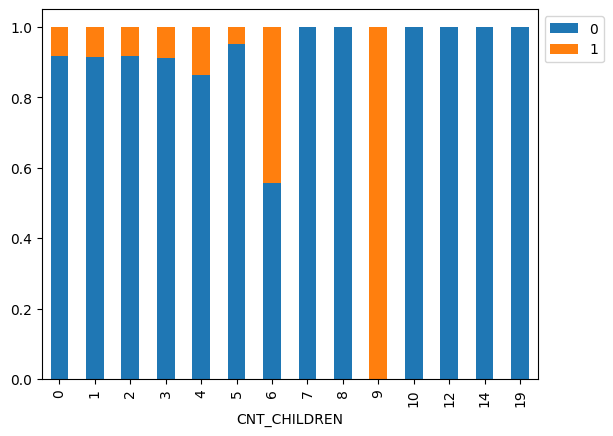

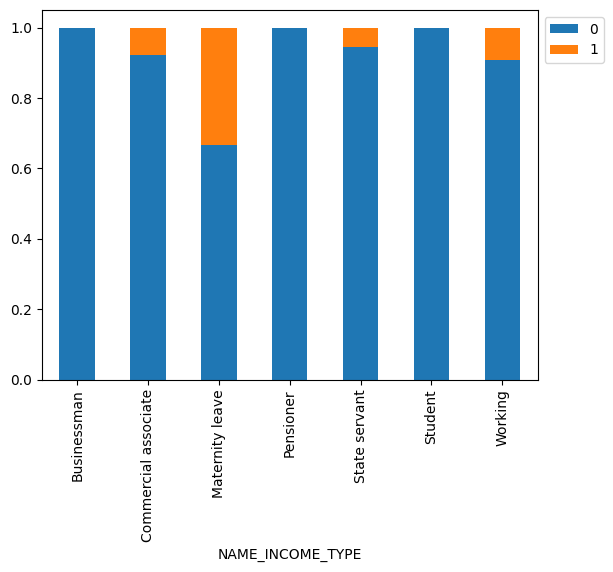

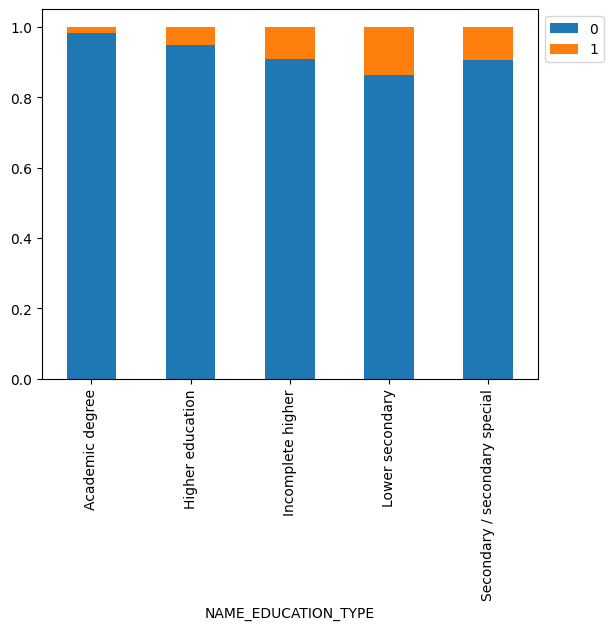

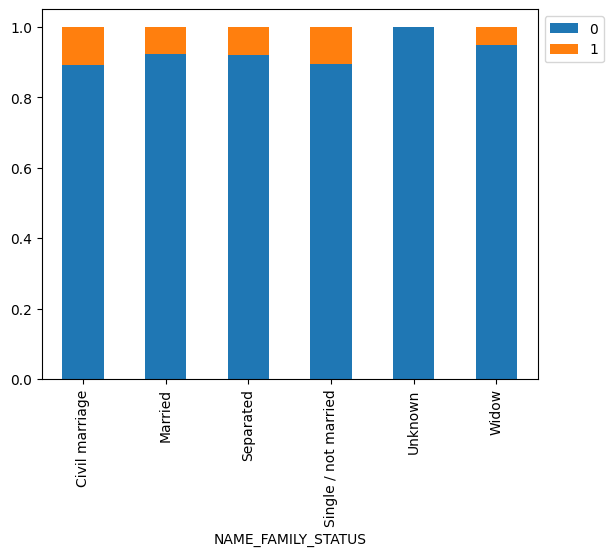

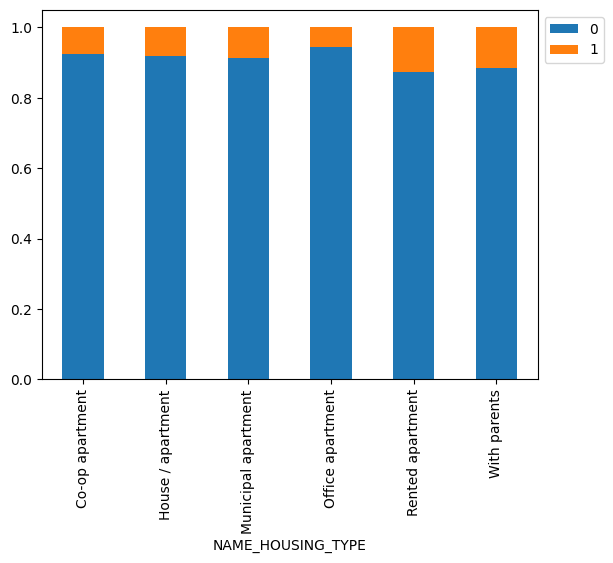

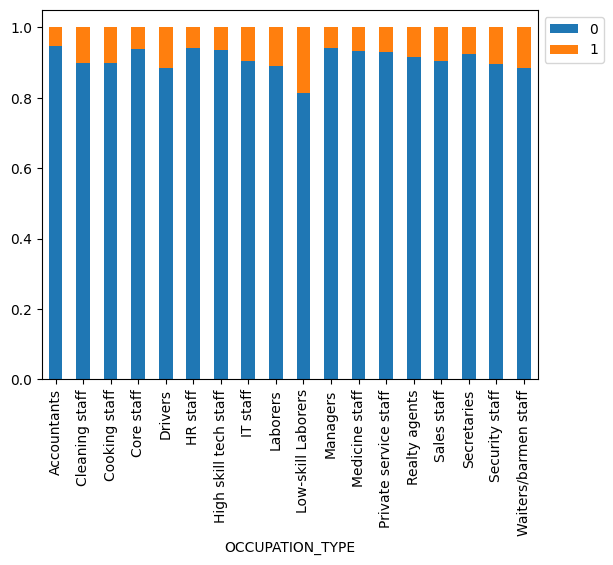

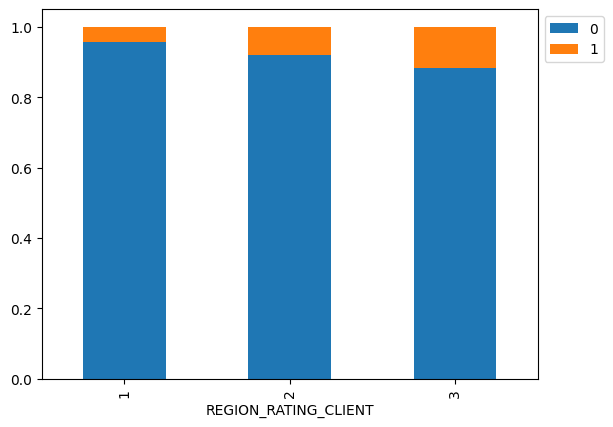

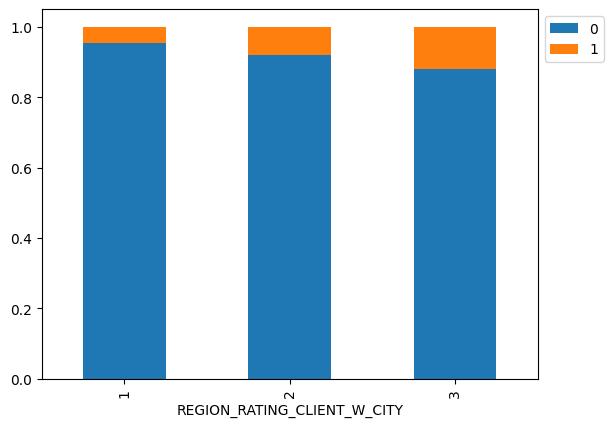

In [23]:
row_count=int(np.ceil(len(disc_cat_var)/2))

for i in disc_cat_var:
    df_reason_bivariate = app_data.groupby(i)['TARGET'].value_counts(normalize = True).unstack()
    ax = df_reason_bivariate.plot(kind='bar', stacked='True')
    ax.legend(bbox_to_anchor=(1.0, 1.0))
    if i == len(disc_cat_var)-1: 
         break
plt.show()

#### Bureau Data

In [124]:
# Need to combine target with bureau data to do bivariate analysis

# cont_var_bureau = ["AMT_CREDIT_MAX_OVERDUE",
#                     "AMT_CREDIT_SUM",
#                     "AMT_CREDIT_SUM_DEBT",
#                     "AMT_CREDIT_SUM_LIMIT",
#                     "AMT_CREDIT_SUM_OVERDUE"]


# for i in range(len(cont_var_bureau)):
#     plt.figure(figsize=(4,3))
#     sns.kdeplot(data=bureau_data, x=cont_var_bureau[i], hue="TARGET", fill = True)
#     title = "Distribution of " + cont_var_bureau[i] + " by Default Rate"
#     plt.title(title)

ValueError: Could not interpret value `TARGET` for `hue`. An entry with this name does not appear in `data`.

<Figure size 400x300 with 0 Axes>

## 2. Data Preparation

#### Application Data

Feature Selection - Correlation Heatmap: Identify and remove redundant variables

<Axes: >

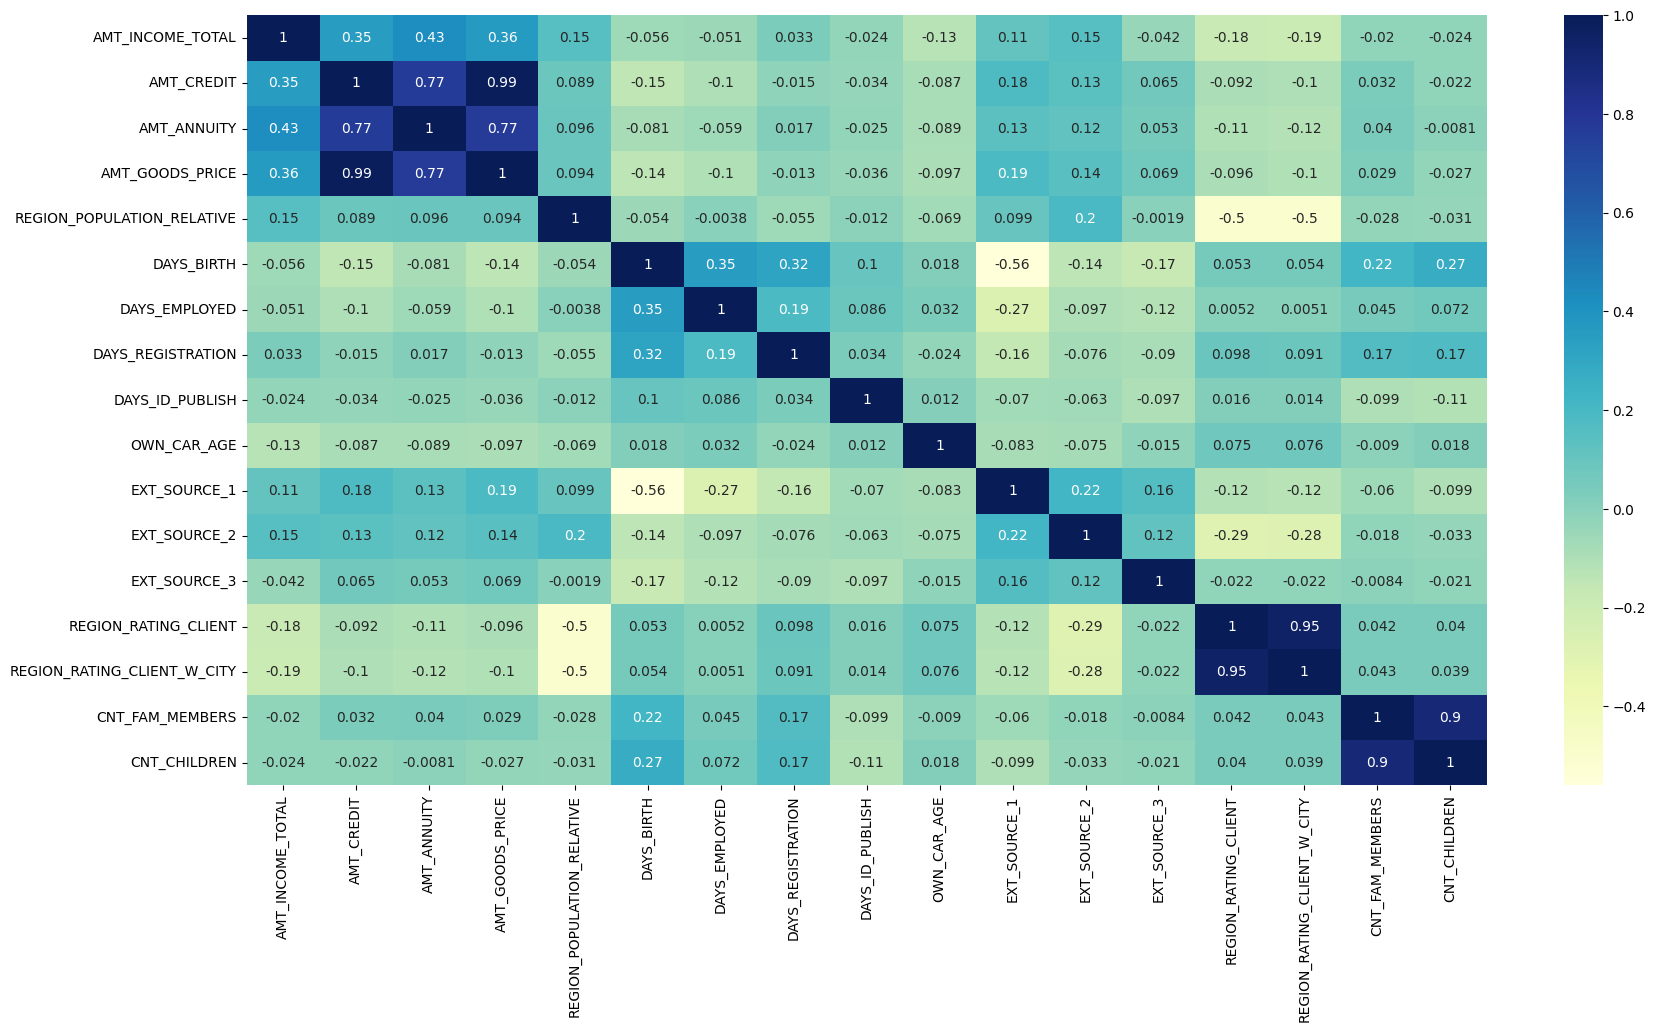

In [102]:
# sample code 
# generate correlation maxtrix
# cont_var = ["AMT_INCOME_TOTAL",
#             "AMT_CREDIT",
#             "AMT_ANNUITY",
#             "AMT_GOODS_PRICE",
#             "REGION_POPULATION_RELATIVE",
#             "DAYS_BIRTH",
#             "DAYS_EMPLOYED",
#             "DAYS_REGISTRATION",
#             "DAYS_ID_PUBLISH",
#             "OWN_CAR_AGE",
#             "EXT_SOURCE_1",
#             "EXT_SOURCE_2",
#             "EXT_SOURCE_3",
#             "REGION_POPULATION_RELATIVE"]

numerical_disc_var = ["REGION_RATING_CLIENT", 
                    "REGION_RATING_CLIENT_W_CITY", 
                    "CNT_FAM_MEMBERS",
                    "CNT_CHILDREN"]

numerical_var = cont_var + numerical_disc_var
        
corr_matrix = app_data[numerical_var].corr()

# plot heat map
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(corr_matrix,xticklabels=corr_matrix.columns,yticklabels=corr_matrix.columns,annot=True,cmap="YlGnBu", ax=ax)

In [103]:
# Identify variables with highest correlation
# Set lower half of matrix to NaN
corr_matrix_top = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Convert to pivot table structure (panda series) to have both variables and their correlation in same row
corr_table = corr_matrix_top.stack()

# Locate variables with correlation > 0.5 (or indicated number)
corr_table_gt_0_5 = corr_table.loc[lambda x: x > 0.5]
print(corr_table_gt_0_5)

AMT_CREDIT            AMT_ANNUITY                   0.77
                      AMT_GOODS_PRICE               0.99
AMT_ANNUITY           AMT_GOODS_PRICE               0.77
REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY   0.95
CNT_FAM_MEMBERS       CNT_CHILDREN                  0.90
dtype: float64


In [97]:
# Drop redundant variables
# Check if this is what we should drop
relevant_cols = cont_var + disc_cat_var
app_data_filtered = app_data[relevant_cols].copy()
app_data_filtered.drop(["AMT_GOODS_PRICE", "AMT_ANNUITY", "REGION_RATING_CLIENT", "CNT_FAM_MEMBERS"], axis=1, inplace=True)
app_data_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113309 entries, 1 to 307508
Data columns (total 20 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   AMT_INCOME_TOTAL             113309 non-null  float64
 1   AMT_CREDIT                   113309 non-null  float64
 2   REGION_POPULATION_RELATIVE   113309 non-null  float64
 3   DAYS_BIRTH                   113309 non-null  int64  
 4   DAYS_EMPLOYED                113309 non-null  int64  
 5   DAYS_REGISTRATION            113309 non-null  float64
 6   DAYS_ID_PUBLISH              113309 non-null  int64  
 7   OWN_CAR_AGE                  39991 non-null   float64
 8   EXT_SOURCE_1                 54413 non-null   float64
 9   EXT_SOURCE_2                 113081 non-null  float64
 10  EXT_SOURCE_3                 90883 non-null   float64
 11  FLAG_OWN_CAR                 113309 non-null  object 
 12  FLAG_OWN_REALTY              113309 non-null  object 
 13  CNT_

#### Bureau Data

Feature Selection - Correlation Heatmap: Identify and remove redundant variables

<Axes: >

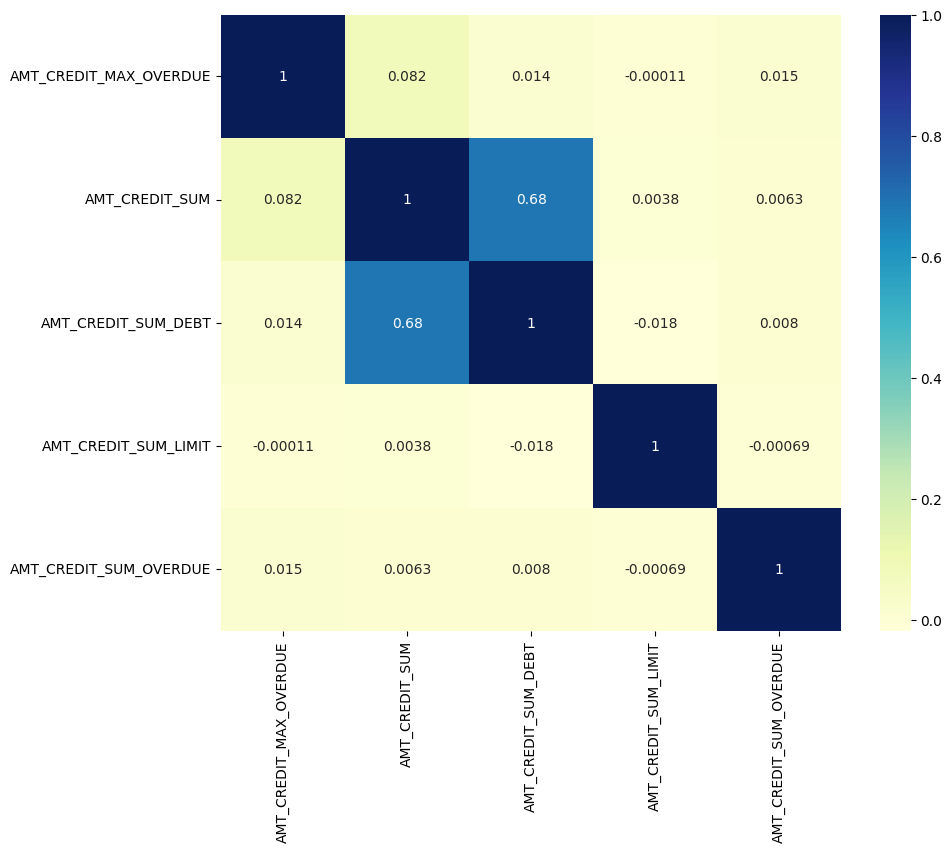

In [101]:
# sample code 
# generate correlation maxtrix
cont_var_bureau = ["AMT_CREDIT_MAX_OVERDUE",
                    "AMT_CREDIT_SUM",
                    "AMT_CREDIT_SUM_DEBT",
                    "AMT_CREDIT_SUM_LIMIT",
                    "AMT_CREDIT_SUM_OVERDUE"]

        
corr_matrix_bureau = bureau_data[cont_var_bureau].corr()

# plot heat map
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(corr_matrix_bureau,xticklabels=corr_matrix_bureau.columns,yticklabels=corr_matrix_bureau.columns,annot=True,cmap="YlGnBu", ax=ax)

In [105]:
# Identify variables with highest correlation
# Set lower half of matrix to NaN
corr_matrix_top_bureau = corr_matrix_bureau.where(np.triu(np.ones(corr_matrix_bureau.shape), k=1).astype(bool))

# Convert to pivot table structure (panda series) to have both variables and their correlation in same row
corr_table_bureau = corr_matrix_top_bureau.stack()

# Locate variables with correlation > 0.5 (or indicated number)
corr_table_gt_0_5_bureau = corr_table_bureau.loc[lambda x: x > 0.5]
print(corr_table_gt_0_5_bureau)

AMT_CREDIT_SUM  AMT_CREDIT_SUM_DEBT   0.68
dtype: float64


### Select Columns and Filter Out Self-Employed & Age (application_data.csv)


In [24]:
# list of selected cols from applicate_data.csv
selected_cols_application = ["SK_ID_CURR", 
                              "TARGET",
                              "FLAG_OWN_CAR",
                              "FLAG_OWN_REALTY",
                              "CNT_CHILDREN",
                              "AMT_INCOME_TOTAL",
                              "AMT_CREDIT",
                              "AMT_ANNUITY",
                              "AMT_GOODS_PRICE",
                              "NAME_INCOME_TYPE",
                              "NAME_EDUCATION_TYPE",
                              "NAME_FAMILY_STATUS",
                              "NAME_HOUSING_TYPE",
                              "REGION_POPULATION_RELATIVE",
                              "DAYS_BIRTH",
                              "DAYS_EMPLOYED",
                              "DAYS_REGISTRATION",
                              "DAYS_ID_PUBLISH",
                              "OWN_CAR_AGE",
                              "OCCUPATION_TYPE",
                              "CNT_FAM_MEMBERS",
                              "REGION_RATING_CLIENT",
                              "REGION_RATING_CLIENT_W_CITY",
                              "EXT_SOURCE_1",
                              "EXT_SOURCE_2",
                              "EXT_SOURCE_3",
                              "OBS_30_CNT_SOCIAL_CIRCLE",
                              "DEF_30_CNT_SOCIAL_CIRCLE",
                              "OBS_60_CNT_SOCIAL_CIRCLE",
                              "DEF_60_CNT_SOCIAL_CIRCLE",
                              "AMT_REQ_CREDIT_BUREAU_HOUR",
                              "AMT_REQ_CREDIT_BUREAU_DAY",
                              "AMT_REQ_CREDIT_BUREAU_WEEK",
                              "AMT_REQ_CREDIT_BUREAU_MON",
                              "AMT_REQ_CREDIT_BUREAU_QRT",
                              "AMT_REQ_CREDIT_BUREAU_YEAR"]

# extract selected columns and filter by self-employed
filtered_app_data = app_data[app_data['ORGANIZATION_TYPE'] == 'Self-employed'][selected_cols_application]
filtered_app_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38412 entries, 13 to 307504
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   SK_ID_CURR                   38412 non-null  int64  
 1   TARGET                       38412 non-null  int64  
 2   FLAG_OWN_CAR                 38412 non-null  object 
 3   FLAG_OWN_REALTY              38412 non-null  object 
 4   CNT_CHILDREN                 38412 non-null  int64  
 5   AMT_INCOME_TOTAL             38412 non-null  float64
 6   AMT_CREDIT                   38412 non-null  float64
 7   AMT_ANNUITY                  38409 non-null  float64
 8   AMT_GOODS_PRICE              38360 non-null  float64
 9   NAME_INCOME_TYPE             38412 non-null  object 
 10  NAME_EDUCATION_TYPE          38412 non-null  object 
 11  NAME_FAMILY_STATUS           38412 non-null  object 
 12  NAME_HOUSING_TYPE            38412 non-null  object 
 13  REGION_POPULATION_R

In [25]:
# create AGE variable using DAYS_BIRTH
filtered_app_data['AGE'] = filtered_app_data['DAYS_BIRTH']/-365
filtered_app_data['AGE'] = filtered_app_data['AGE'].astype(int)

# drop DAYS_BIRTH variables - no longer needed since AGE already exists
filtered_app_data.drop("DAYS_BIRTH", axis=1, inplace=True)

In [26]:
# Select records with applicants aged between 18 and 35
filtered_app_data = filtered_app_data[(filtered_app_data["AGE"] >= 18) & (filtered_app_data["AGE"] <= 35)]

In [27]:
# Select records with applicants with credit amount < 500k
filtered_app_data = filtered_app_data[(filtered_app_data["AMT_CREDIT"] <= 500000)]
filtered_app_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8271 entries, 22 to 307457
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   SK_ID_CURR                   8271 non-null   int64  
 1   TARGET                       8271 non-null   int64  
 2   FLAG_OWN_CAR                 8271 non-null   object 
 3   FLAG_OWN_REALTY              8271 non-null   object 
 4   CNT_CHILDREN                 8271 non-null   int64  
 5   AMT_INCOME_TOTAL             8271 non-null   float64
 6   AMT_CREDIT                   8271 non-null   float64
 7   AMT_ANNUITY                  8271 non-null   float64
 8   AMT_GOODS_PRICE              8249 non-null   float64
 9   NAME_INCOME_TYPE             8271 non-null   object 
 10  NAME_EDUCATION_TYPE          8271 non-null   object 
 11  NAME_FAMILY_STATUS           8271 non-null   object 
 12  NAME_HOUSING_TYPE            8271 non-null   object 
 13  REGION_POPULATION_RE

In [28]:
# identify columns with NULL values
filtered_app_data.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
FLAG_OWN_CAR                      0
FLAG_OWN_REALTY                   0
CNT_CHILDREN                      0
AMT_INCOME_TOTAL                  0
AMT_CREDIT                        0
AMT_ANNUITY                       0
AMT_GOODS_PRICE                  22
NAME_INCOME_TYPE                  0
NAME_EDUCATION_TYPE               0
NAME_FAMILY_STATUS                0
NAME_HOUSING_TYPE                 0
REGION_POPULATION_RELATIVE        0
DAYS_EMPLOYED                     0
DAYS_REGISTRATION                 0
DAYS_ID_PUBLISH                   0
OWN_CAR_AGE                    5447
OCCUPATION_TYPE                 739
CNT_FAM_MEMBERS                   0
REGION_RATING_CLIENT              0
REGION_RATING_CLIENT_W_CITY       0
EXT_SOURCE_1                   3570
EXT_SOURCE_2                     19
EXT_SOURCE_3                   2456
OBS_30_CNT_SOCIAL_CIRCLE         35
DEF_30_CNT_SOCIAL_CIRCLE         35
OBS_60_CNT_SOCIAL_CIRCLE    

### Select Columns (bureau_data.csv)

In [29]:
# list selected columns
selected_cols_bureau = ["SK_ID_CURR",
                        "AMT_CREDIT_MAX_OVERDUE",
                        "CNT_CREDIT_PROLONG",
                        "AMT_CREDIT_SUM",
                        "AMT_CREDIT_SUM_DEBT",
                        "AMT_CREDIT_SUM_LIMIT",
                        "AMT_CREDIT_SUM_OVERDUE",
                        "CREDIT_ACTIVE",]

# extract selected columns of bureau data
filtered_bureau_data = bureau_data[selected_cols_bureau]
filtered_bureau_data

,SK_ID_CURR,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_ACTIVE
0,215354,NaN,0,91323.00,0.00,NaN,0.00,Closed
1,215354,NaN,0,225000.00,171342.00,NaN,0.00,Active
2,215354,NaN,0,464323.50,NaN,NaN,0.00,Active
3,215354,NaN,0,90000.00,NaN,NaN,0.00,Active
4,215354,77674.50,0,2700000.00,NaN,NaN,0.00,Active
...,...,...,...,...,...,...,...,...
1716423,259355,0.00,0,11250.00,11250.00,0.00,0.00,Active
1716424,100044,5476.50,0,38130.84,0.00,0.00,0.00,Closed
1716425,100044,NaN,0,15570.00,NaN,NaN,0.00,Closed
1716426,246829,NaN,0,36000.00,0.00,0.00,0.00,Closed


#### Aggregate Credit Bureau Data

In [30]:


# Create new column to count number of active loans using num_loan_dataset
active_loan = pd.DataFrame(filtered_bureau_data[(filtered_bureau_data["CREDIT_ACTIVE"]=="Active")].groupby("SK_ID_CURR").count())
active_loan.rename(columns={"CREDIT_ACTIVE": "NUM_ACTIVE_LOANS"}, inplace=True)
# Drop everything but SK_ID_CURR and NUM_ACTIVE_LOANS
active_loan.drop(["AMT_CREDIT_MAX_OVERDUE", "CNT_CREDIT_PROLONG", "AMT_CREDIT_SUM", "AMT_CREDIT_SUM_DEBT", "AMT_CREDIT_SUM_LIMIT", "AMT_CREDIT_SUM_OVERDUE"], axis=1, inplace=True)

# Create new column to count number of sold loans using num_loan_dataset
sold_loan = pd.DataFrame(filtered_bureau_data[(filtered_bureau_data["CREDIT_ACTIVE"]=="Sold")].groupby("SK_ID_CURR").count())
sold_loan.rename(columns={"CREDIT_ACTIVE": "NUM_SOLD_LOANS"}, inplace=True)
# Drop everything but SK_ID_CURR and NUM_SOLD_LOANS
sold_loan.drop(["AMT_CREDIT_MAX_OVERDUE", "CNT_CREDIT_PROLONG", "AMT_CREDIT_SUM", "AMT_CREDIT_SUM_DEBT", "AMT_CREDIT_SUM_LIMIT", "AMT_CREDIT_SUM_OVERDUE"], axis=1, inplace=True)

# Create new column to count number of bad debt loans using num_loan_dataset
bad_debt_loan = pd.DataFrame(filtered_bureau_data[(filtered_bureau_data["CREDIT_ACTIVE"]=="Bad debt")].groupby("SK_ID_CURR").count())
bad_debt_loan.rename(columns={"CREDIT_ACTIVE": "NUM_BAD_DEBT_LOANS"}, inplace=True)
# Drop everything but SK_ID_CURR and NUM_BAD_DEBT_LOANS
bad_debt_loan.drop(["AMT_CREDIT_MAX_OVERDUE", "CNT_CREDIT_PROLONG", "AMT_CREDIT_SUM", "AMT_CREDIT_SUM_DEBT", "AMT_CREDIT_SUM_LIMIT", "AMT_CREDIT_SUM_OVERDUE"], axis=1, inplace=True)

# Create new column to count number of closed loans using num_loan_dataset
closed_loan = pd.DataFrame(filtered_bureau_data[(filtered_bureau_data["CREDIT_ACTIVE"]=="Closed")].groupby("SK_ID_CURR").count())
closed_loan.rename(columns={"CREDIT_ACTIVE": "NUM_CLOSED_LOANS"}, inplace=True)
# Drop everything but SK_ID_CURR and NUM_CLOSED_LOANS
closed_loan.drop(["AMT_CREDIT_MAX_OVERDUE", "CNT_CREDIT_PROLONG", "AMT_CREDIT_SUM", "AMT_CREDIT_SUM_DEBT", "AMT_CREDIT_SUM_LIMIT", "AMT_CREDIT_SUM_OVERDUE"], axis=1, inplace=True)

#craete a new column to count number of total loans using num_loan_dataset per person
total_loan = pd.DataFrame(filtered_bureau_data.groupby("SK_ID_CURR").count())

# Join all the above by SK_ID_CURR
num_loan_dataset = pd.merge(active_loan, sold_loan, on="SK_ID_CURR", how="outer")
num_loan_dataset = pd.merge(num_loan_dataset, bad_debt_loan, on="SK_ID_CURR", how="outer")
num_loan_dataset = pd.merge(num_loan_dataset, closed_loan, on="SK_ID_CURR", how="outer")
num_loan_dataset.fillna(0, inplace=True)
num_loan_dataset["ACTIVE_CLOSE_DEBT_RATIO"] = num_loan_dataset["NUM_ACTIVE_LOANS"] / num_loan_dataset["NUM_CLOSED_LOANS"]
num_loan_dataset["BAD_DEBT_CLOSE_RATIO"] = num_loan_dataset["NUM_BAD_DEBT_LOANS"] / num_loan_dataset["NUM_CLOSED_LOANS"]

# Drop Active, Bad debt and Closed columns
num_loan_dataset.drop(["NUM_ACTIVE_LOANS", "NUM_CLOSED_LOANS","NUM_BAD_DEBT_LOANS"], axis=1, inplace=True)


# Average AMT_CREDIT_SUM_DEBT, AMT_CREDIT_SUM_OVERDUE, AMT_CREDIT_SUM for each SK_ID_CURR 

avg_bureau_data = filtered_bureau_data.drop("CREDIT_ACTIVE", axis=1).groupby("SK_ID_CURR").mean()
avg_bureau_data
# Drop all columns except SK_ID_CURR, AMT_CREDIT_SUM_DEBT, AMT_CREDIT_SUM_OVERDUE, AMT_CREDIT_SUM
avg_bureau_data.drop(["AMT_CREDIT_MAX_OVERDUE", "CNT_CREDIT_PROLONG", "AMT_CREDIT_SUM_LIMIT"], axis=1, inplace=True)
# Rename columns to include "AVG_" prefix
avg_bureau_data.rename(columns={"AMT_CREDIT_SUM": "AVG_AMT_CREDIT_SUM", "AMT_CREDIT_SUM_DEBT": "AVG_AMT_CREDIT_SUM_DEBT", "AMT_CREDIT_SUM_OVERDUE": "AVG_AMT_CREDIT_SUM_OVERDUE"}, inplace=True)
# Merge with num_active_loans
aggregated_credit_bureau_data = pd.merge(avg_bureau_data, num_loan_dataset,on="SK_ID_CURR")

aggregated_credit_bureau_data

,AVG_AMT_CREDIT_SUM,AVG_AMT_CREDIT_SUM_DEBT,AVG_AMT_CREDIT_SUM_OVERDUE,NUM_SOLD_LOANS,ACTIVE_CLOSE_DEBT_RATIO,BAD_DEBT_CLOSE_RATIO
SK_ID_CURR,,,,,,
100001,207623.57,85240.93,0.00,0.00,0.75,0.00
100002,108131.95,49156.20,0.00,0.00,0.33,0.00
100003,254350.12,0.00,0.00,0.00,0.33,0.00
100004,94518.90,0.00,0.00,0.00,0.00,0.00
100005,219042.00,189469.50,0.00,0.00,2.00,0.00
...,...,...,...,...,...,...
456249,284142.97,16307.10,0.00,0.00,0.18,0.00
456250,1028819.85,744013.36,0.00,0.00,2.00,0.00
456253,990000.00,448958.25,0.00,0.00,1.00,0.00


### Join Application and Bureau Data

In [31]:
# left join
unclean_merged_data = filtered_app_data.merge(aggregated_credit_bureau_data, how="left", on="SK_ID_CURR")

In [32]:
unclean_merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8271 entries, 0 to 8270
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   SK_ID_CURR                   8271 non-null   int64  
 1   TARGET                       8271 non-null   int64  
 2   FLAG_OWN_CAR                 8271 non-null   object 
 3   FLAG_OWN_REALTY              8271 non-null   object 
 4   CNT_CHILDREN                 8271 non-null   int64  
 5   AMT_INCOME_TOTAL             8271 non-null   float64
 6   AMT_CREDIT                   8271 non-null   float64
 7   AMT_ANNUITY                  8271 non-null   float64
 8   AMT_GOODS_PRICE              8249 non-null   float64
 9   NAME_INCOME_TYPE             8271 non-null   object 
 10  NAME_EDUCATION_TYPE          8271 non-null   object 
 11  NAME_FAMILY_STATUS           8271 non-null   object 
 12  NAME_HOUSING_TYPE            8271 non-null   object 
 13  REGION_POPULATION_

### Data Cleaning

### Handling Missing Values

To address missing values, the team decided to leave them as missing as adding filling these data could skew the model in the wrong direction

In [33]:
## Get Propotion of Null Values 
# Total number of records
total_records = unclean_merged_data.shape[0]

# Get proportion of null values for each column
null_propotion = unclean_merged_data.isnull().sum()/total_records

# Get columns with null values > 10%
null_propotion[null_propotion > 0.2]


OWN_CAR_AGE                  0.66
EXT_SOURCE_1                 0.43
EXT_SOURCE_3                 0.30
AMT_REQ_CREDIT_BUREAU_HOUR   0.21
AMT_REQ_CREDIT_BUREAU_DAY    0.21
AMT_REQ_CREDIT_BUREAU_WEEK   0.21
AMT_REQ_CREDIT_BUREAU_MON    0.21
AMT_REQ_CREDIT_BUREAU_QRT    0.21
AMT_REQ_CREDIT_BUREAU_YEAR   0.21
AVG_AMT_CREDIT_SUM           0.22
AVG_AMT_CREDIT_SUM_DEBT      0.24
AVG_AMT_CREDIT_SUM_OVERDUE   0.22
NUM_SOLD_LOANS               0.22
ACTIVE_CLOSE_DEBT_RATIO      0.22
BAD_DEBT_CLOSE_RATIO         0.37
dtype: float64

#### Drop Columns with high proportion of missing data

In [34]:
# Drop Columns with null values > 60%
unclean_merged_data.drop(["OWN_CAR_AGE"], axis=1, inplace=True)

### Identifying Outliers

To address outliers, our team identified extreme outliers and used business reasons to decide whether to keep, replace, or delete the outliers

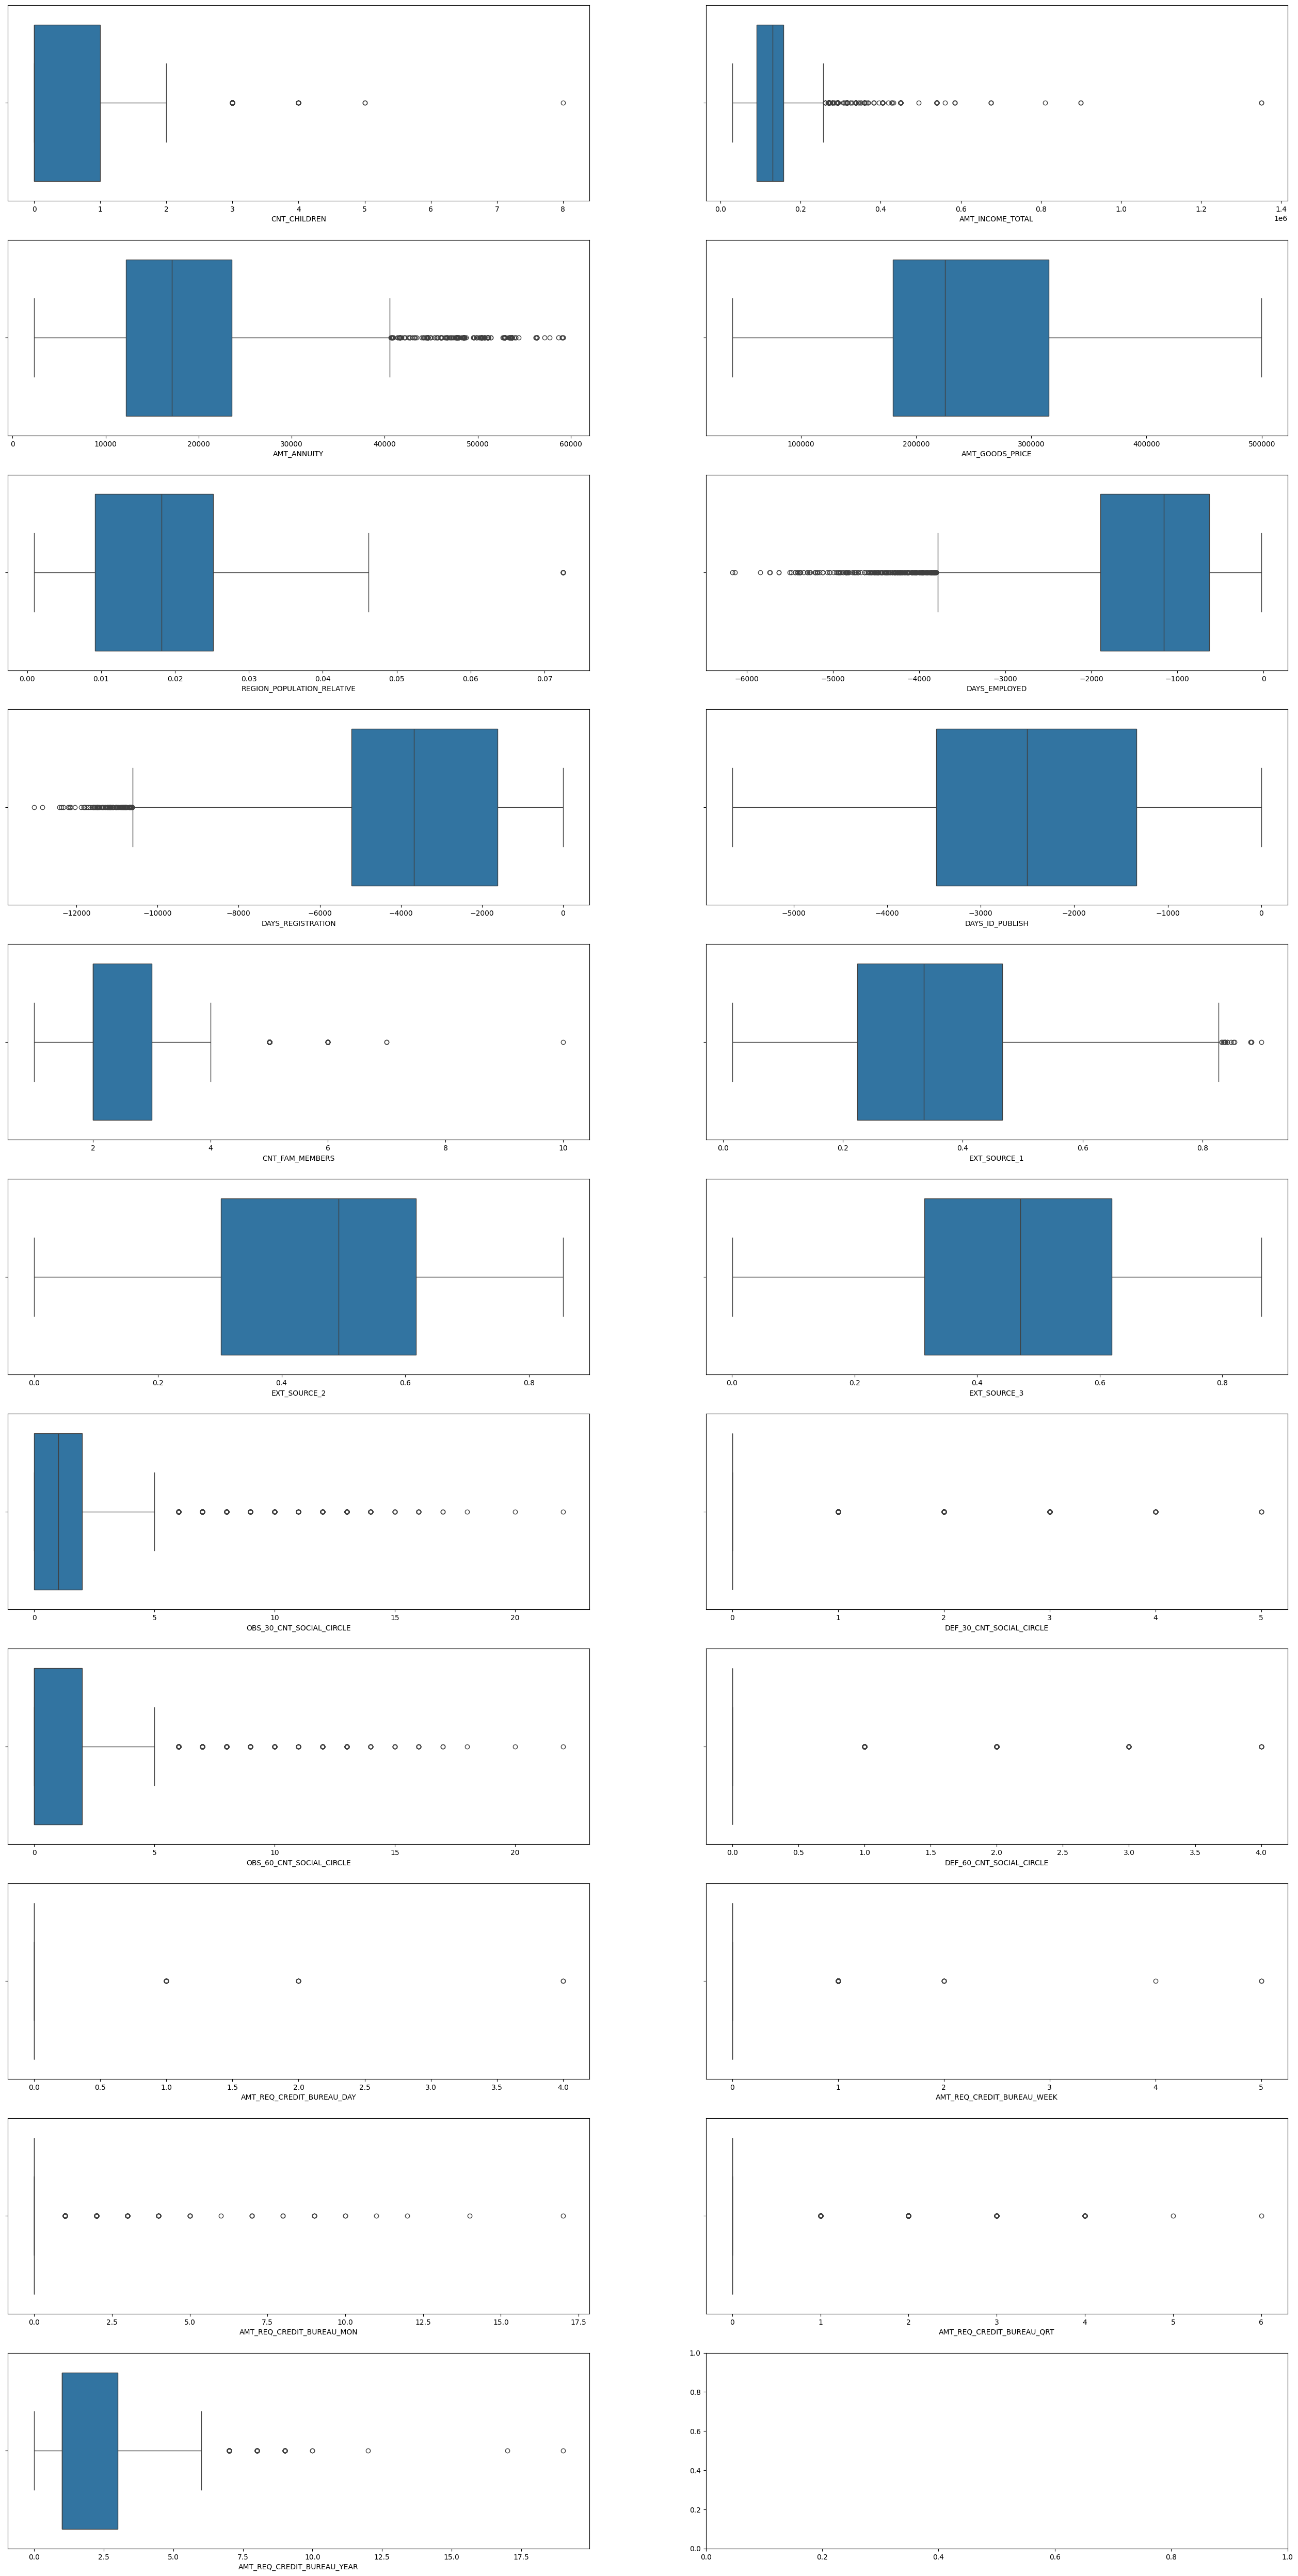

In [35]:
# sample code
# Variables not included due to non-numerical values involved or low numerical values:
    # Categorical values - "FLAG_OWN_CAR", "FLAG_OWN_REALTY", "NAME_INCOME_TYPE", "NAME_EDUCATION_TYPE", "NAME_FAMILY_STATUS", "NAME_HOUSING_TYPE", "OCCUPATION_TYPE",

    # OWN_CAR_AGE can't be analysed due to data cells with "Missing"

    # Limit set on values - AGE and AMT_CREDIT

    # Low values - "REGION_RATING_CLIENT", "REGION_RATING_CLIENT_W_CITY", "AMT_REQ_CREDIT_BUREAU_HOUR",

# create boxplots
large_numeric_var = [
                "CNT_CHILDREN",
                "AMT_INCOME_TOTAL",
                "AMT_ANNUITY",
                "AMT_GOODS_PRICE",
                "REGION_POPULATION_RELATIVE",
                "DAYS_EMPLOYED",
                "DAYS_REGISTRATION",
                "DAYS_ID_PUBLISH",
                "CNT_FAM_MEMBERS",
                "EXT_SOURCE_1",
                "EXT_SOURCE_2",
                "EXT_SOURCE_3",
                "OBS_30_CNT_SOCIAL_CIRCLE",
                "DEF_30_CNT_SOCIAL_CIRCLE",
                "OBS_60_CNT_SOCIAL_CIRCLE",
                "DEF_60_CNT_SOCIAL_CIRCLE",
                "AMT_REQ_CREDIT_BUREAU_DAY",
                "AMT_REQ_CREDIT_BUREAU_WEEK",
                "AMT_REQ_CREDIT_BUREAU_MON",
                "AMT_REQ_CREDIT_BUREAU_QRT",
                "AMT_REQ_CREDIT_BUREAU_YEAR"]

row_count=int(np.ceil(len(large_numeric_var)/2))

# create the figure and two subplots
fig, axes = plt.subplots(ncols=2, nrows=row_count, figsize=(32, 64))

for i, axis in enumerate(fig.axes):
    sns.boxplot(ax=axis, data=filtered_app_data, x = large_numeric_var[i],orient='h')
    axis.set_xlabel(str(large_numeric_var[i]))
    if i == len(large_numeric_var)-1: 
         break

# Show the plot
plt.show()


In [36]:
# Dropping columns with too many outliers and irrelevant columns
unclean_merged_data.drop(["OBS_30_CNT_SOCIAL_CIRCLE", "DEF_30_CNT_SOCIAL_CIRCLE", "OBS_60_CNT_SOCIAL_CIRCLE", "DEF_60_CNT_SOCIAL_CIRCLE", "AMT_REQ_CREDIT_BUREAU_HOUR","AMT_REQ_CREDIT_BUREAU_DAY", "AMT_REQ_CREDIT_BUREAU_QRT","AMT_REQ_CREDIT_BUREAU_WEEK", "AMT_REQ_CREDIT_BUREAU_MON", "AMT_REQ_CREDIT_BUREAU_QRT", "AMT_REQ_CREDIT_BUREAU_YEAR"], axis=1,inplace=True)
unclean_merged_data

,SK_ID_CURR,TARGET,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,...,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,AGE,AVG_AMT_CREDIT_SUM,AVG_AMT_CREDIT_SUM_DEBT,AVG_AMT_CREDIT_SUM_OVERDUE,NUM_SOLD_LOANS,ACTIVE_CLOSE_DEBT_RATIO,BAD_DEBT_CLOSE_RATIO
0,100026,0,N,N,1,450000.00,497520.00,32521.50,450000.00,Working,...,NaN,0.46,0.36,30,1875000.00,1738907.19,0.00,0.00,2.00,0.00
1,100041,0,N,N,0,112500.00,450000.00,44509.50,450000.00,Working,...,NaN,0.66,0.68,33,63254.24,0.00,0.00,0.00,0.08,0.00
2,100052,0,N,Y,1,90000.00,180000.00,9000.00,180000.00,Working,...,NaN,0.54,NaN,21,NaN,NaN,NaN,NaN,NaN,NaN
3,100061,0,N,Y,2,225000.00,314055.00,16164.00,238500.00,Commercial associate,...,0.19,0.70,0.70,28,37741.50,0.00,0.00,0.00,0.00,0.00
4,100089,0,N,Y,0,135000.00,337761.00,15781.50,256500.00,Working,...,NaN,0.55,0.54,26,116545.50,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8266,456078,0,N,Y,0,112500.00,390960.00,21339.00,337500.00,Working,...,NaN,0.27,NaN,23,NaN,NaN,NaN,NaN,NaN,NaN
8267,456108,1,N,Y,1,135000.00,457834.50,33444.00,378000.00,Working,...,NaN,0.15,0.13,34,168275.04,108897.75,0.00,0.00,1.00,0.00
8268,456110,0,Y,Y,2,180000.00,180000.00,9000.00,180000.00,Commercial associate,...,0.41,0.62,NaN,34,6760620.00,6510321.00,0.00,0.00,inf,NaN
8269,456174,0,N,N,2,135000.00,215640.00,17064.00,180000.00,Working,...,0.31,0.66,0.78,30,64469.25,0.00,0.00,0.00,0.00,0.00


### Identifying Highly Correlated Variables

Our team plotted a heatmap to visualise the correlation between the variables and dropped highly correlated variables

<Axes: >

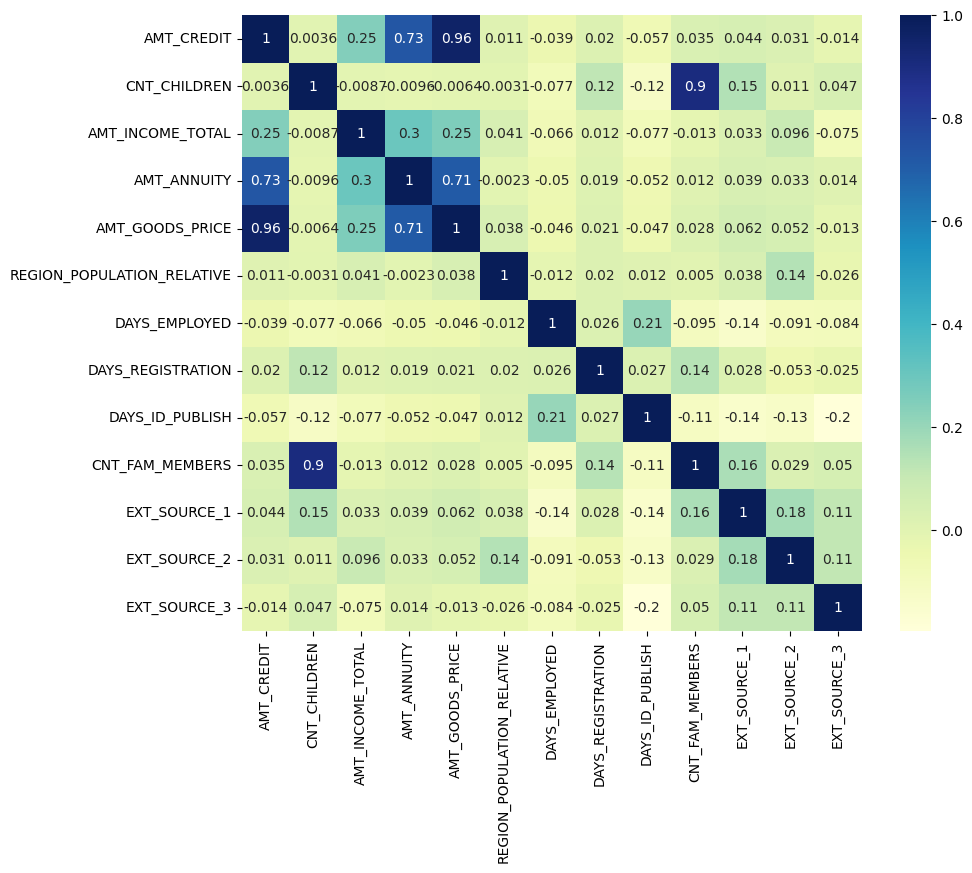

In [37]:
# sample code 
# OWN_CAR_AGE can't be analysed due to data cells with "Missing"

    # Limit set on values - AGE and AMT_CREDIT

    # Low values - "REGION_RATING_CLIENT", "REGION_RATING_CLIENT_W_CITY", "AMT_REQ_CREDIT_BUREAU_HOUR",

# create boxplots
# generate correlation maxtrix
numerical_cols = ["AMT_CREDIT",
                "CNT_CHILDREN",
                "AMT_INCOME_TOTAL",
                "AMT_ANNUITY",
                "AMT_GOODS_PRICE",
                "REGION_POPULATION_RELATIVE",
                "DAYS_EMPLOYED",
                "DAYS_REGISTRATION",
                "DAYS_ID_PUBLISH",
                "CNT_FAM_MEMBERS",
                "EXT_SOURCE_1",
                "EXT_SOURCE_2",
                "EXT_SOURCE_3"]
cor = unclean_merged_data[numerical_cols].corr()

# plot heat map
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(cor,xticklabels=cor.columns,yticklabels=cor.columns,annot=True,cmap="YlGnBu", ax=ax)

Side Note: Might Delete this away! cause i already removed based on the outliers <br/>
####  Highly correlated variables (r > 0.7)
- CNT_CHILDREN & CNT_FAM_MEMBERS: corr 0.9 --> drop CNT_CHILDREN as CNT_FAM_MEMBERS includes cnt_children
- AMT_CREDIT & AMT_ANNUITY: corr 0.73 --> drop AMT_ANNUITY as anuity is calculated from AMT_CREDIT
- AMT_CREDIT & AMT_GOODS_PRICE: corr 0.96 --> drop AMT_GOODS_PRICE as it is included in AMT_CREDIT
- AMT_ANNUITY & AMT_GOODS_PRICE: corr 0.71 --> dropped both as seen above

In [38]:
unclean_merged_data.drop(["CNT_CHILDREN","AMT_ANNUITY", "AMT_GOODS_PRICE"], axis=1, inplace=True)

### Dropping unncessary columns because of relative to business context
- SK_ID_CURR
- REGION_POPULATION_RELATIVE
- DAYS_REGISTRATION
- DAYS_ID_PUBLISH
- AVG_AMT_CREDIT_SUM
- REGION_RATING_CLIENT_W_CITY
- REGION_RATING_CLIENT
- EXT_SOURCE_1
- EXT_SOURCE_2
- EXT_SOURCE_3

In [39]:
# Drop unnecessary columns mentioned 
unclean_merged_data.drop(["SK_ID_CURR","REGION_POPULATION_RELATIVE","DAYS_REGISTRATION","DAYS_ID_PUBLISH","AVG_AMT_CREDIT_SUM","REGION_RATING_CLIENT_W_CITY","REGION_RATING_CLIENT"], axis=1,inplace=True)

In [40]:
len(unclean_merged_data.columns)

21

### Calculating IVs for all columns



In [41]:
bins = sc.woebin(unclean_merged_data,y='TARGET')

[INFO] creating woe binning ...


Binning on 8271 rows and 21 columns in 00:00:20


{'EXT_SOURCE_3': <Figure size 640x480 with 2 Axes>,
 'NAME_EDUCATION_TYPE': <Figure size 640x480 with 2 Axes>,
 'NAME_INCOME_TYPE': <Figure size 640x480 with 2 Axes>,
 'ACTIVE_CLOSE_DEBT_RATIO': <Figure size 640x480 with 2 Axes>,
 'NUM_SOLD_LOANS': <Figure size 640x480 with 2 Axes>,
 'BAD_DEBT_CLOSE_RATIO': <Figure size 640x480 with 2 Axes>,
 'EXT_SOURCE_2': <Figure size 640x480 with 2 Axes>,
 'AGE': <Figure size 640x480 with 2 Axes>,
 'AVG_AMT_CREDIT_SUM_OVERDUE': <Figure size 640x480 with 2 Axes>,
 'FLAG_OWN_REALTY': <Figure size 640x480 with 2 Axes>,
 'FLAG_OWN_CAR': <Figure size 640x480 with 2 Axes>,
 'EXT_SOURCE_1': <Figure size 640x480 with 2 Axes>,
 'AVG_AMT_CREDIT_SUM_DEBT': <Figure size 640x480 with 2 Axes>,
 'NAME_HOUSING_TYPE': <Figure size 640x480 with 2 Axes>,
 'NAME_FAMILY_STATUS': <Figure size 640x480 with 2 Axes>,
 'DAYS_EMPLOYED': <Figure size 640x480 with 2 Axes>,
 'AMT_INCOME_TOTAL': <Figure size 640x480 with 2 Axes>,
 'CNT_FAM_MEMBERS': <Figure size 640x480 with 2 A

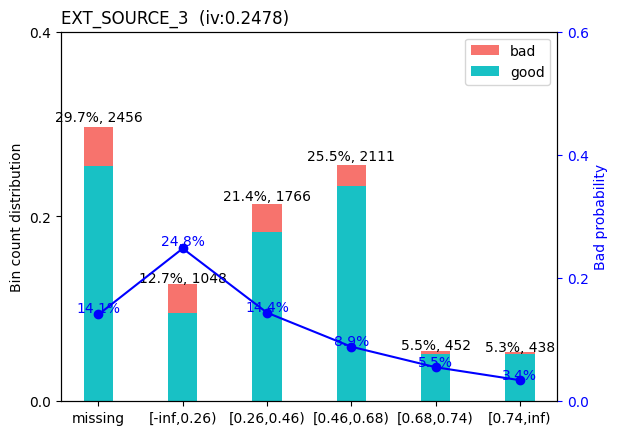

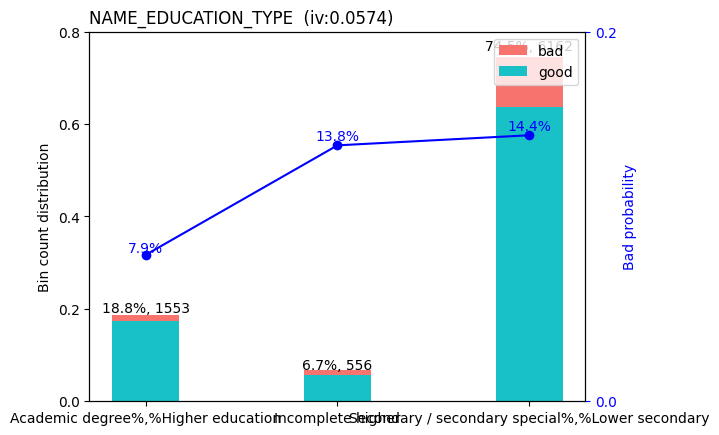

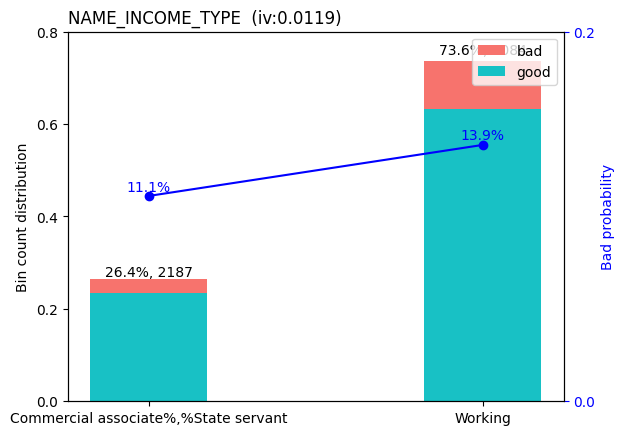

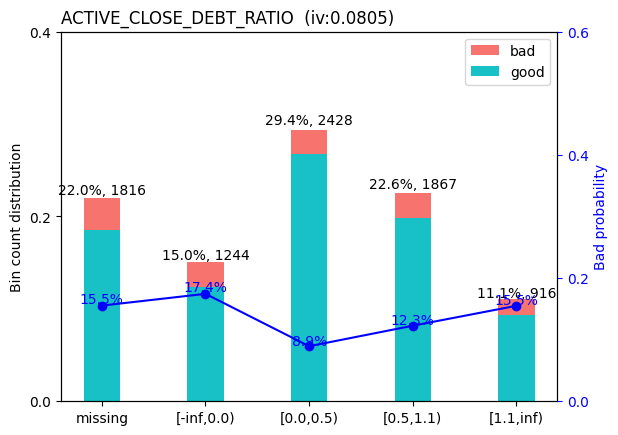

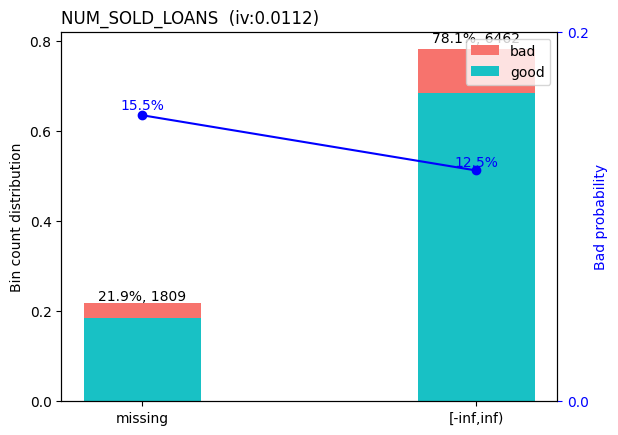

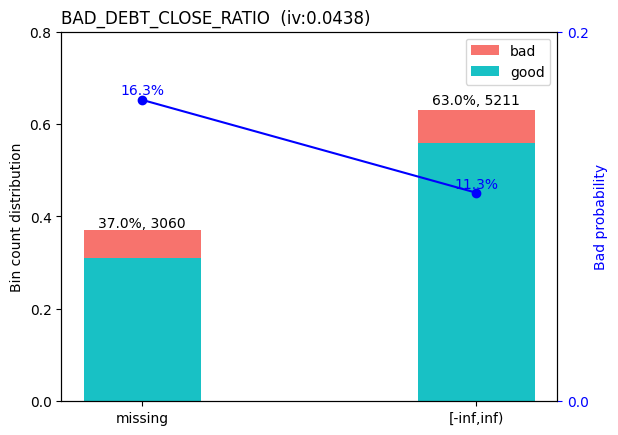

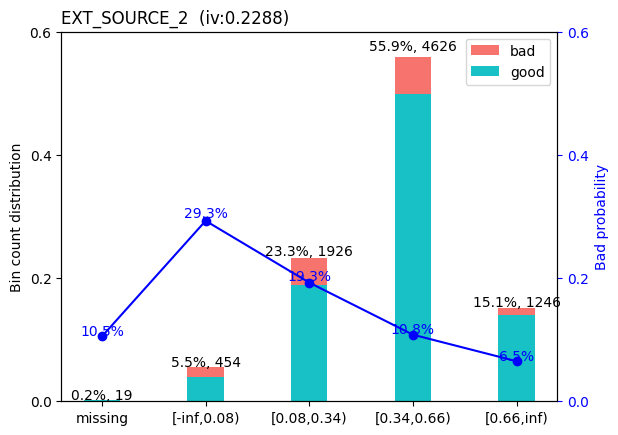

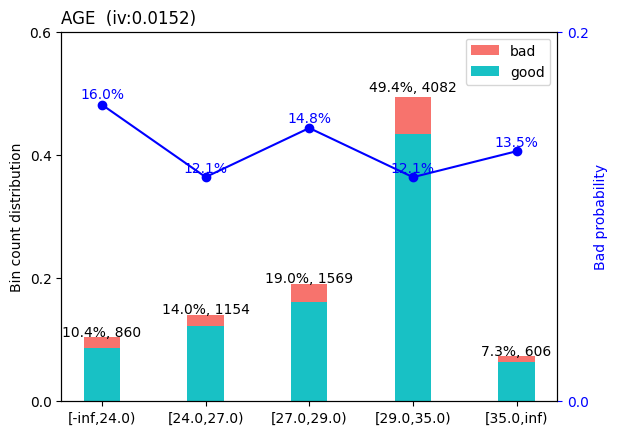

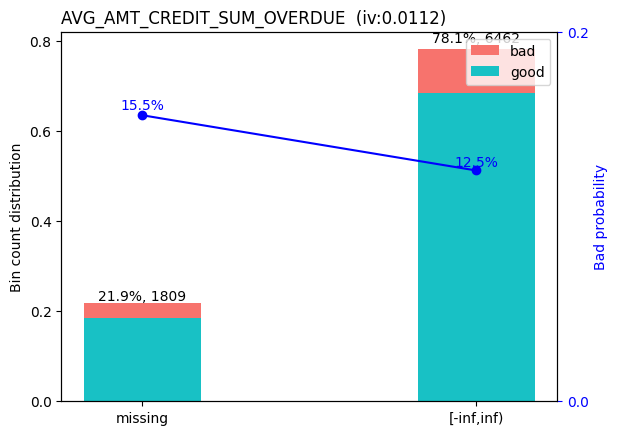

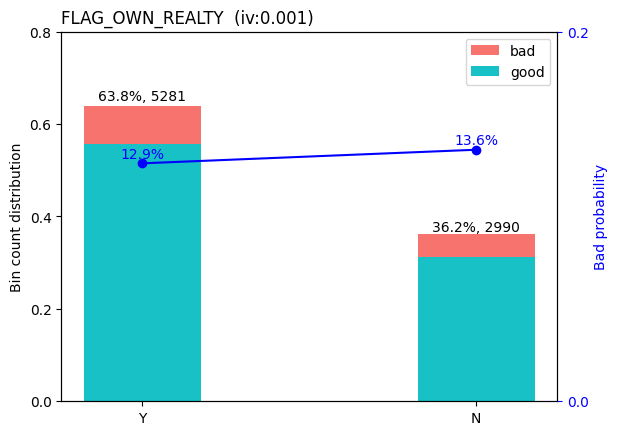

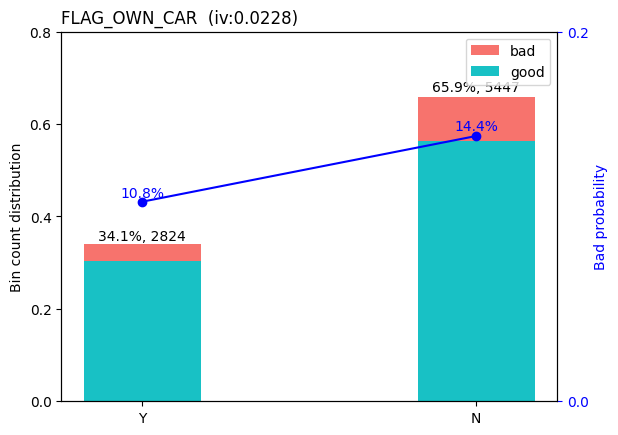

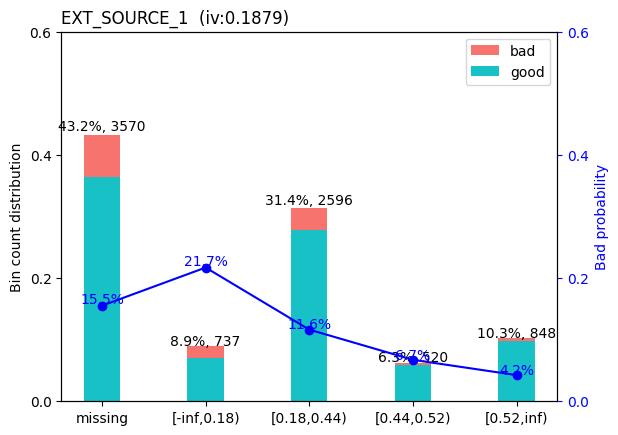

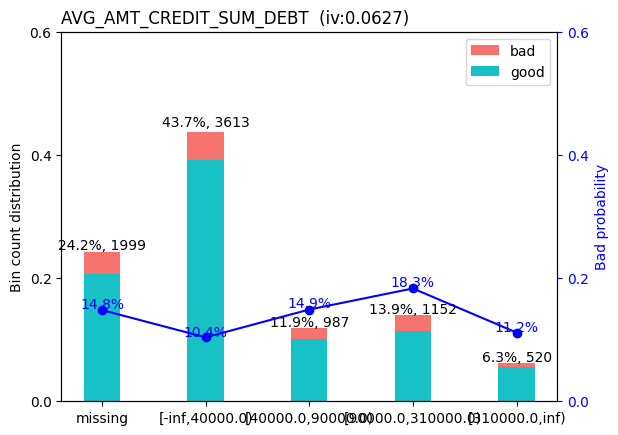

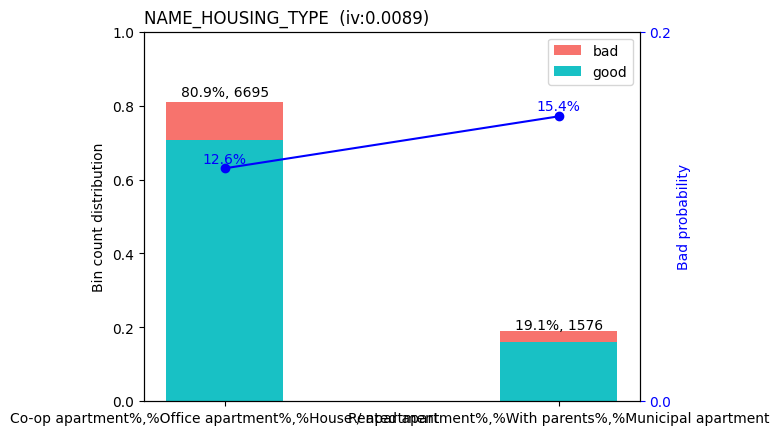

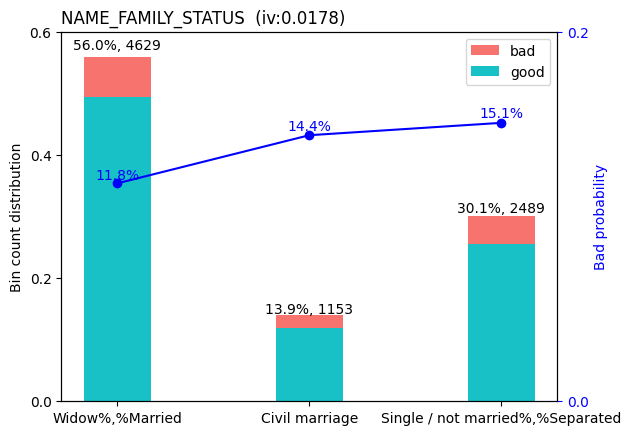

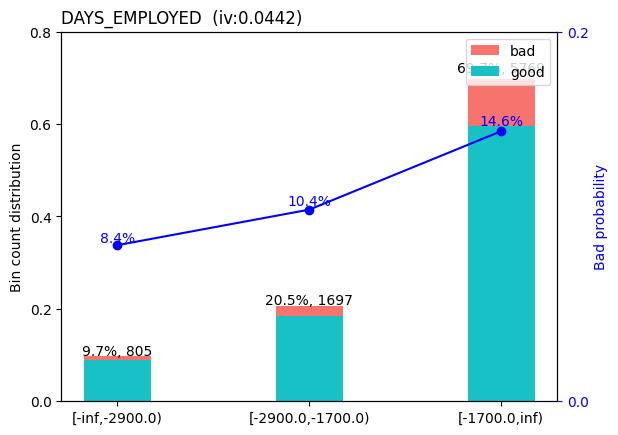

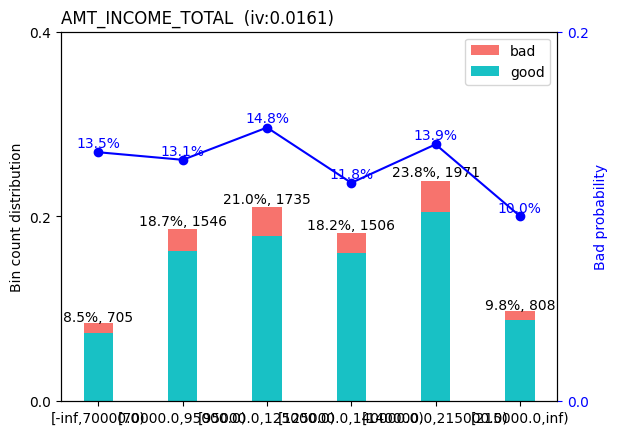

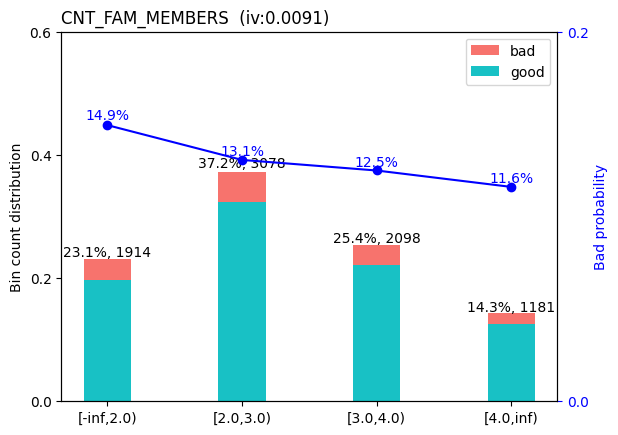

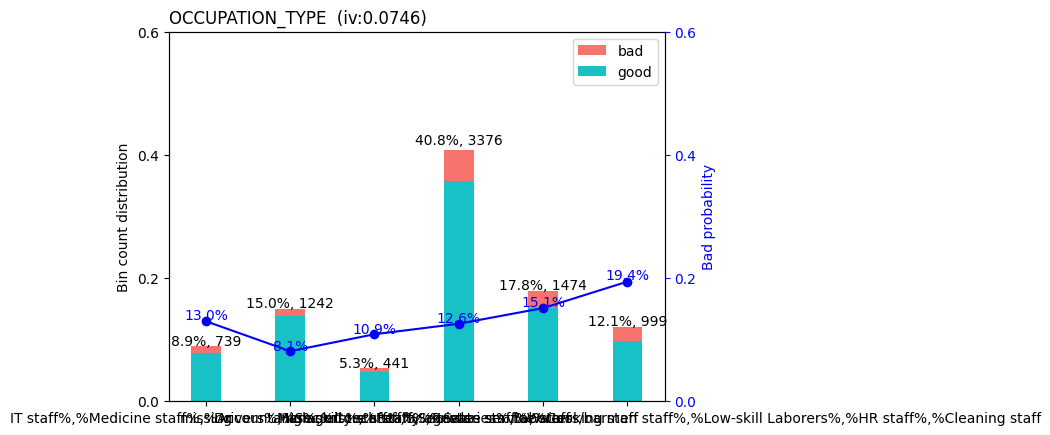

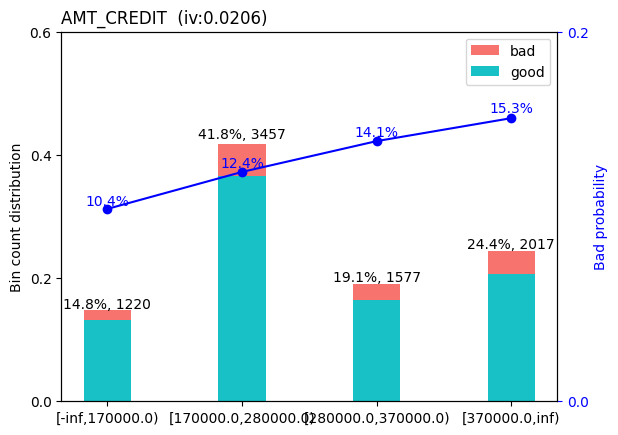

In [42]:
sc.woebin_plot(bins)

### Extract columns with IV >= 0.02

In [43]:
## Extract Columsn with IV > 0.02,  Drop values with no predictive power
# selected_columns = ["NAME_HOUSING_TYPE", "CNT_FAM_MEMBERS", "NUM_LOANS_SOLD", "NAME_INCOME_TYPE", "AMT_INCOME_TOTAL", "AMT_CREDIT", "AGE", "TARGET"]
